Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [71]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [72]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [73]:
data.shape

(8425, 23)

In [74]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [76]:
data.describe(include='all')

Date   Location      MinTemp      MaxTemp     Rainfall  \
count         8425       8425  8350.000000  8365.000000  8185.000000   
unique        3004         12          NaN          NaN          NaN   
top     2011-01-31  Melbourne          NaN          NaN          NaN   
freq             5       1622          NaN          NaN          NaN   
mean           NaN        NaN    13.193305    23.859976     2.805913   
std            NaN        NaN     5.403596     6.136408    10.459379   
min            NaN        NaN    -2.000000     8.200000     0.000000   
25%            NaN        NaN     9.200000    19.300000     0.000000   
50%            NaN        NaN    13.300000    23.300000     0.000000   
75%            NaN        NaN    17.400000    28.000000     1.000000   
max            NaN        NaN    28.500000    45.500000   371.000000   

        Evaporation     Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   4913.000000  4431.000000        7434    7434.000000       7596  ...   
unique          NaN          NaN          16            NaN         16  ...   
top             NaN          NaN           N            NaN          N  ...   
freq            NaN          NaN         713            NaN        906  ...   
mean       5.389395     7.632205         NaN      40.174469        NaN  ...   
std        5.044484     3.896235         NaN      14.665721        NaN  ...   
min        0.000000     0.000000         NaN       7.000000        NaN  ...   
25%        2.600000     4.750000         NaN      30.000000        NaN  ...   
50%        4.600000     8.700000         NaN      39.000000        NaN  ...   
75%        7.000000    10.700000         NaN      50.000000        NaN  ...   
max      145.000000    13.900000         NaN     107.000000        NaN  ...   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count   8366.000000  8323.000000  7116.000000  7113.000000  6004.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      67.822496    51.249790  1017.640233  1015.236075     4.566622   
std       16.833283    18.423774     6.828699     6.766681     2.877658   
min       10.000000     6.000000   989.800000   982.900000     0.000000   
25%       56.000000    39.000000  1013.000000  1010.400000     1.000000   
50%       68.000000    51.000000  1017.700000  1015.300000     5.000000   
75%       80.000000    63.000000  1022.300000  1019.800000     7.000000   
max      100.000000    99.000000  1039.000000  1036.000000     8.000000   

           Cloud3pm      Temp9am      Temp3pm  RainToday  RainTomorrow  
count   5970.000000  8369.000000  8329.000000       8185          8186  
unique          NaN          NaN          NaN          2             2  
top             NaN          NaN          NaN         No            No  
freq            NaN          NaN          NaN       6195          6195  
mean       4.503183    17.762015    22.442934        NaN           NaN  
std        2.731659     5.627035     5.980020        NaN           NaN  
min        0.000000     1.900000     7.300000        NaN           NaN  
25%        2.000000    13.800000    18.000000        NaN           NaN  
50%        5.000000    17.800000    21.900000        NaN           NaN  
75%        7.000000    21.900000    26.400000        NaN           NaN  
max        8.000000    39.400000    44.100000        NaN           NaN  

[11 rows x 23 columns]

### Data Cleaning

#### here is present included data describe of both continoues and catgorical column.we can see here very null values and missing values are present

In [77]:
# firstly null values fill
numerical_feature = [feature for feature in data.columns if data[feature].dtypes !='O']
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Numerical Features Count()",format(len(numerical_feature)))
print("Discreate Feature Count()",format(len(discrete_feature)))
print("Continous Feature Count()",format(len(continous_feature)))
print("Categorical Feature Count()",format(len(categorical_feature)))

Numerical Features Count() 16
Discreate Feature Count() 2
Continous Feature Count() 14
Categorical Feature Count() 7


In [78]:
data['Cloud9am'].isnull().sum()

2421

In [79]:
data['Cloud9am'].sample(data['Cloud9am'].isnull().sum(),random_state=0)

1220    1.0
532     NaN
5998    1.0
7707    6.0
509     8.0
       ... 
7310    0.0
3251    8.0
4632    6.0
7911    6.0
898     8.0
Name: Cloud9am, Length: 2421, dtype: float64

In [80]:
data['Cloud9am'].dropna().sample(data['Cloud9am'].isnull().sum(),random_state=0)

6507    1.0
1931    2.0
5852    8.0
1018    0.0
1940    0.0
       ... 
1700    0.0
4412    1.0
2010    8.0
2867    1.0
5858    6.0
Name: Cloud9am, Length: 2421, dtype: float64

In [81]:
# these are catgorical data fill missing values with mode method
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [82]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [83]:
# these are continous data fill by "mean" value
columns_with_nan = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [84]:
for col in columns_with_nan:
    data[col].fillna(data[col].mean(), inplace=True)

In [85]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [86]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Here we have to predict two thing forecast whether or not it will rain tomorrow and predict how much rainfall could be there. so firstly we should build the classification model and then regression model.for classification model rainTomorrow is the target variable. and for regression amount of rainfallin(mm)

## Build Classification model

## Visualization 

### Distplot

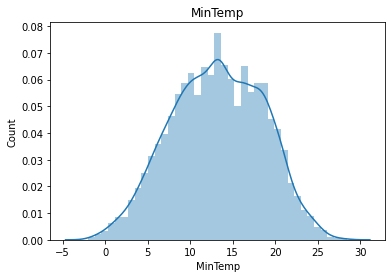

<Figure size 1080x1080 with 0 Axes>

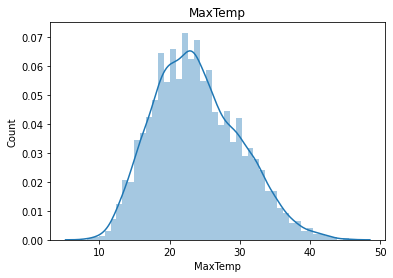

<Figure size 1080x1080 with 0 Axes>

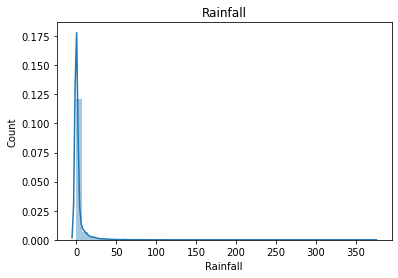

<Figure size 1080x1080 with 0 Axes>

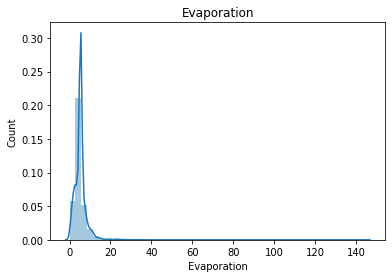

<Figure size 1080x1080 with 0 Axes>

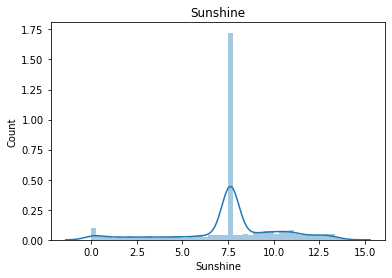

<Figure size 1080x1080 with 0 Axes>

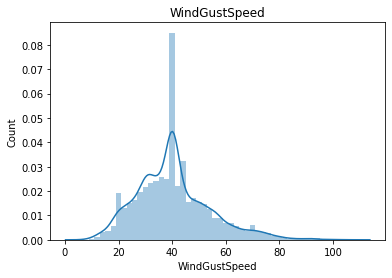

<Figure size 1080x1080 with 0 Axes>

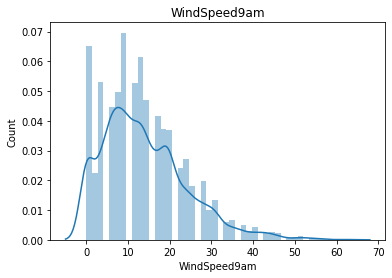

<Figure size 1080x1080 with 0 Axes>

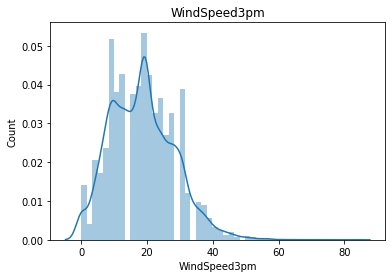

<Figure size 1080x1080 with 0 Axes>

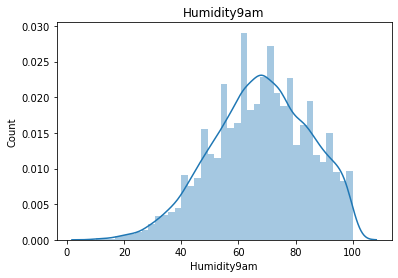

<Figure size 1080x1080 with 0 Axes>

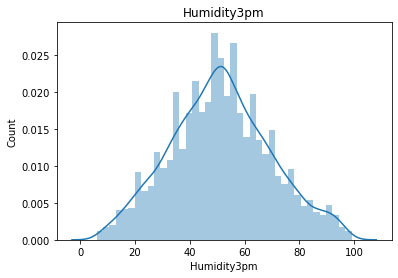

<Figure size 1080x1080 with 0 Axes>

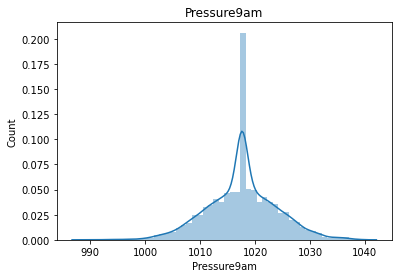

<Figure size 1080x1080 with 0 Axes>

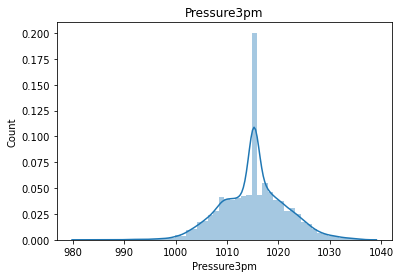

<Figure size 1080x1080 with 0 Axes>

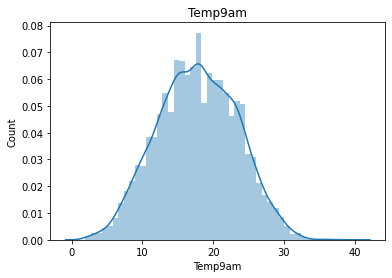

<Figure size 1080x1080 with 0 Axes>

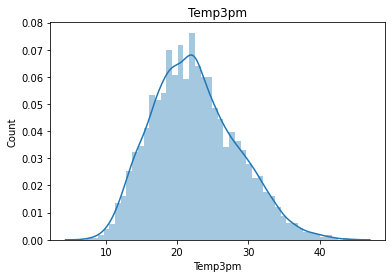

<Figure size 1080x1080 with 0 Axes>

In [87]:
for feature in continous_feature:
    data_c = data.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

### countplot

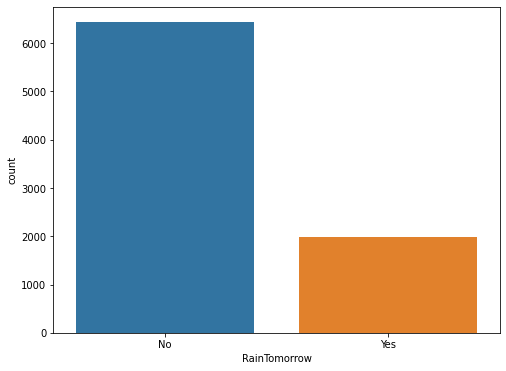

In [88]:
fig = plt.figure(figsize = (8,6))
sns.countplot(x = 'RainTomorrow', data = data)

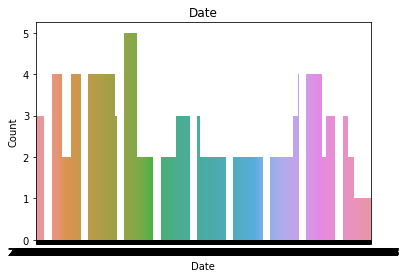

<Figure size 1080x1080 with 0 Axes>

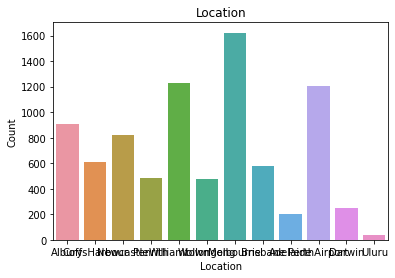

<Figure size 1080x1080 with 0 Axes>

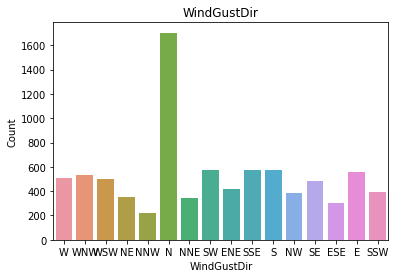

<Figure size 1080x1080 with 0 Axes>

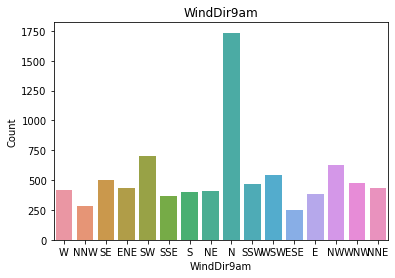

<Figure size 1080x1080 with 0 Axes>

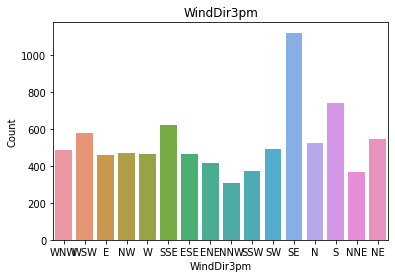

<Figure size 1080x1080 with 0 Axes>

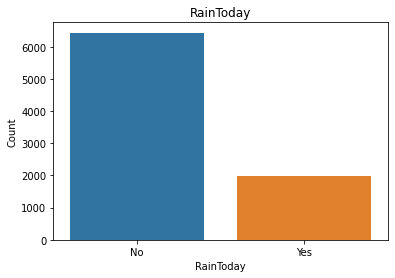

<Figure size 1080x1080 with 0 Axes>

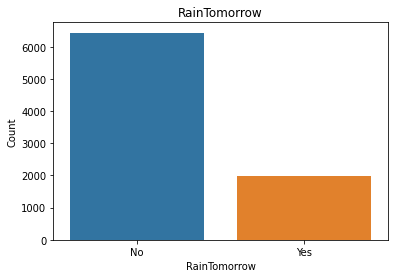

<Figure size 1080x1080 with 0 Axes>

In [89]:
for feature in categorical_feature:
    data_c = data.copy()
    sns.countplot(data_c[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

## EDA

In [90]:
data['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [91]:
# let's find the unique value

for feature in categorical_feature:
    print("Cardinality(no. of unique values) of {} are: {}".format(feature,len(data[feature].unique())))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 16
Cardinality(no. of unique values) of WindDir9am are: 16
Cardinality(no. of unique values) of WindDir3pm are: 16
Cardinality(no. of unique values) of RainToday are: 2
Cardinality(no. of unique values) of RainTomorrow are: 2


#### Date column has high cardinality which poses several problems to ml model in terms of efficency and also dimenionality of data also increases when converted to numerical data.

In [92]:
# Type conversion of Date Column to datetime type:

data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtype

dtype('<M8[ns]')

In [93]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data.drop('Date', axis = 1, inplace = True)

In [94]:
data.head(6)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   
3   Albury      9.2     28.0       0.0     5.389395  7.632205          NE   
4   Albury     17.5     32.3       1.0     5.389395  7.632205           W   
5   Albury     14.6     29.7       0.2     5.389395  7.632205         WNW   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.503183   
1           44.0        NNW        WSW  ...       1007.8  4.566622  4.503183   
2           46.0          W        WSW  ...       1008.7  4.566622  2.000000   
3           24.0         SE          E  ...       1012.8  4.566622  4.503183   
4           41.0        ENE         NW  ...       1006.0  7.000000  8.000000   
5           56.0          W          W  ...       1005.4  4.566622  4.503183   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  
5     20.6     28.9         No            No  2008     12    6  

[6 rows x 25 columns]

In [95]:
data['RainToday'].value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

### Encoding Technique

In [96]:
data['RainTomorrow']=pd.get_dummies(data['RainTomorrow'],drop_first=True)
data['RainToday']=pd.get_dummies(data['RainToday'],drop_first=True)

In [97]:
data.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.503183   
1           44.0        NNW        WSW  ...       1007.8  4.566622  4.503183   
2           46.0          W        WSW  ...       1008.7  4.566622  2.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  
2     21.0     23.2          0             0  2008     12    3  

[3 rows x 25 columns]

In [98]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [99]:
data['Location']= labelencoder.fit_transform(data['Location'])
data['WindGustDir']= labelencoder.fit_transform(data['WindGustDir'])
data['WindDir9am']= labelencoder.fit_transform(data['WindDir9am'])
data['WindDir3pm']= labelencoder.fit_transform(data['WindDir3pm'])

In [100]:
data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday']]

Location  WindGustDir  WindDir9am  WindDir3pm  RainTomorrow  RainToday
0            1           13          13          14             0          0
1            1           14           6          15             0          0
2            1           15          13          15             0          0
3            1            4           9           0             0          0
4            1           13           1           7             0          0
...        ...          ...         ...         ...           ...        ...
8420         9            0           9           1             0          0
8421         9            6           9           3             0          0
8422         9            3           9          14             0          0
8423         9            9          10           3             0          0
8424         9            3           2           2             0          0

[8425 rows x 6 columns]

### Barplot

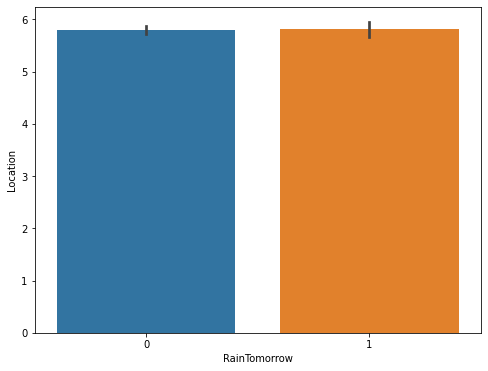

In [101]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'RainTomorrow', y = 'Location', data = data)

#### it show does not matter rain will be happen or not, both condition same

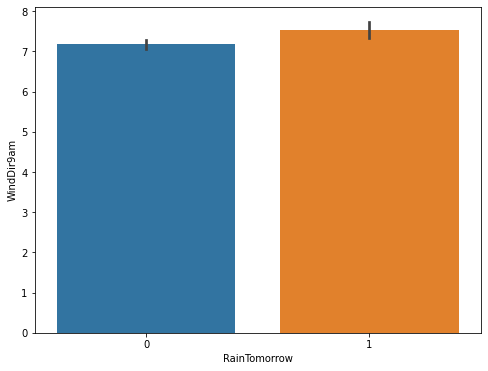

In [102]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'RainTomorrow', y = 'WindDir9am', data = data)

#### during wind direction 9am it quite chances rain will be. 

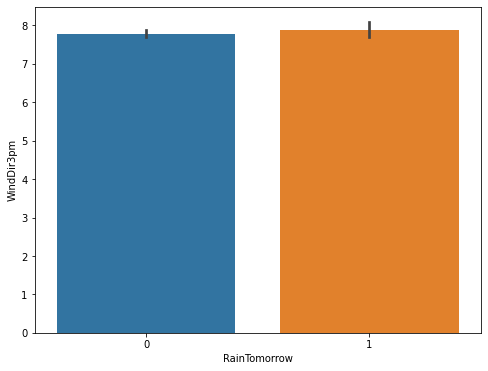

In [103]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'RainTomorrow', y = 'WindDir3pm', data = data)

#### in both condition result will same

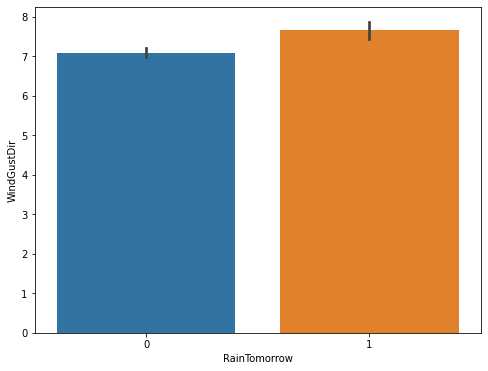

In [104]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'RainTomorrow', y = 'WindGustDir', data = data)

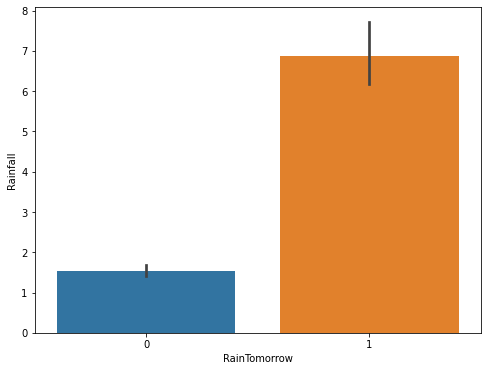

In [105]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'RainTomorrow', y = 'Rainfall', data = data)

#### highly chances of rainfall

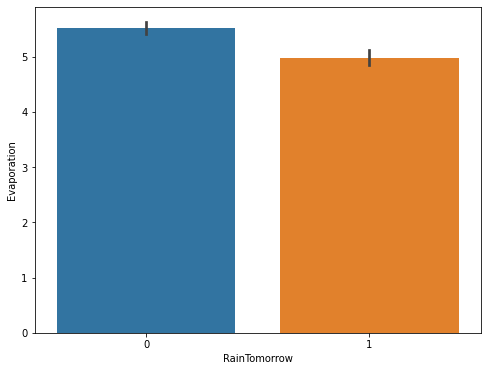

In [106]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'RainTomorrow', y = 'Evaporation', data = data)

#### Evaporation chances is maximum when rain will not tomorrow

### Correlation and skewness

In [107]:
data.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
day             -0.015461
year            -0.011066
month           -0.001243
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

## HeatMap

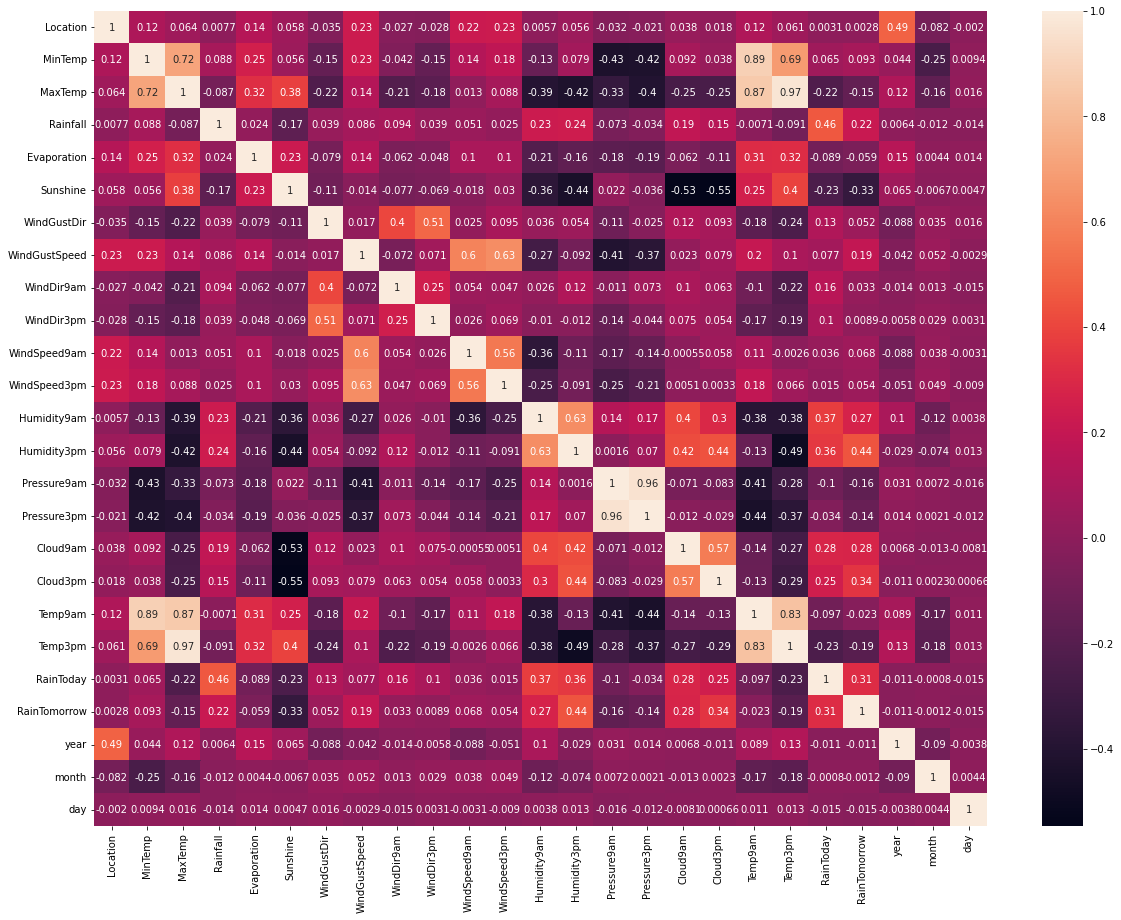

In [108]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)
plt.show()

#### some features are highly correlated to each other like temp9am,temp3pm with mintemp and maxtemp

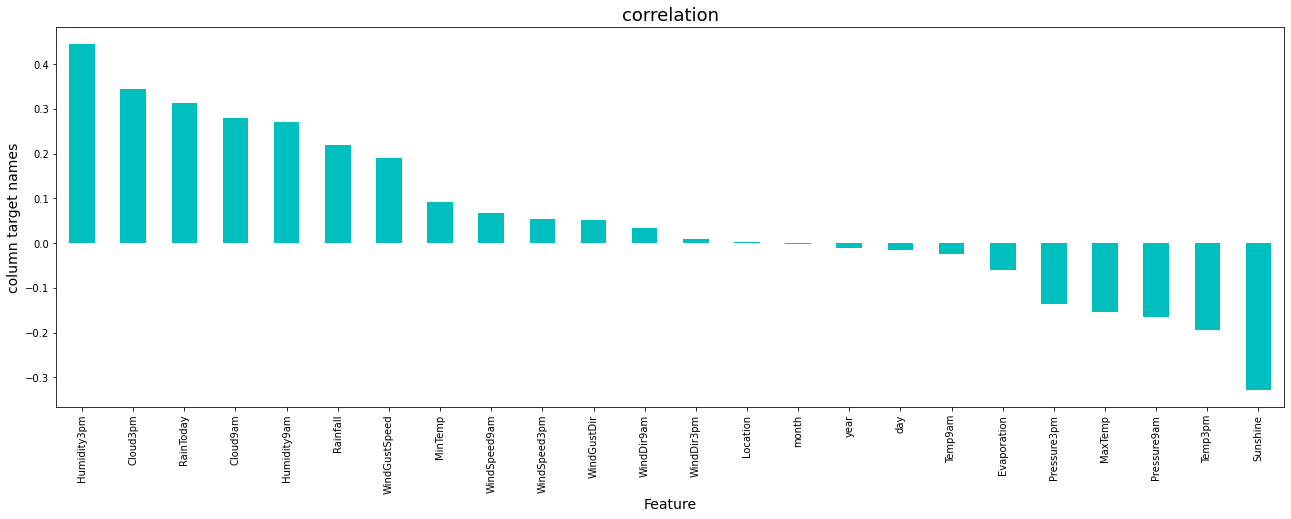

In [109]:
plt.figure(figsize=(22,7))
data.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### location , month and year is ver less correlated to target and each other, so let's drop this column.

## Check for Outliers and skewness

In [110]:
data.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

In [111]:
continous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [112]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [113]:
data.drop(['day','month','year'],axis=1,inplace=True)

#### because they all not correlated to target and each other.

In [114]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          13          14  ...         71.0         22.0   
1           44.0           6          15  ...         44.0         25.0   
2           46.0          13          15  ...         38.0         30.0   
3           24.0           9           0  ...         45.0         16.0   
4           41.0           1           7  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 22 columns]

### Box plot

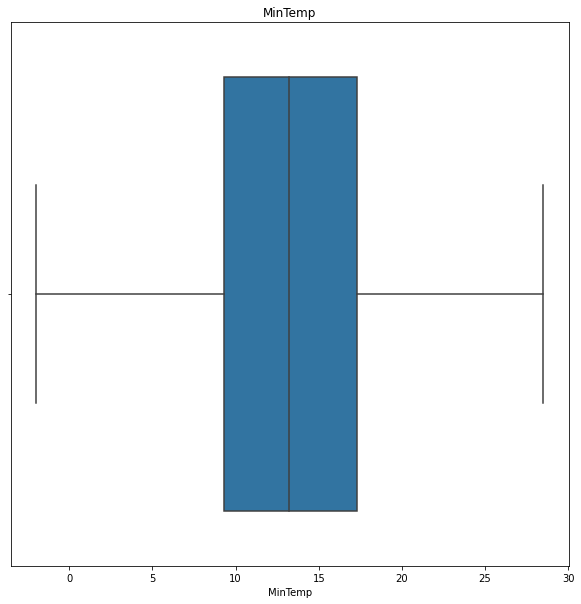

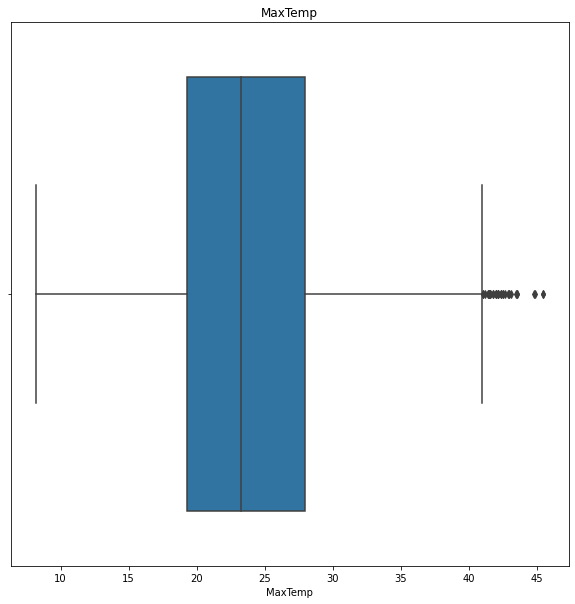

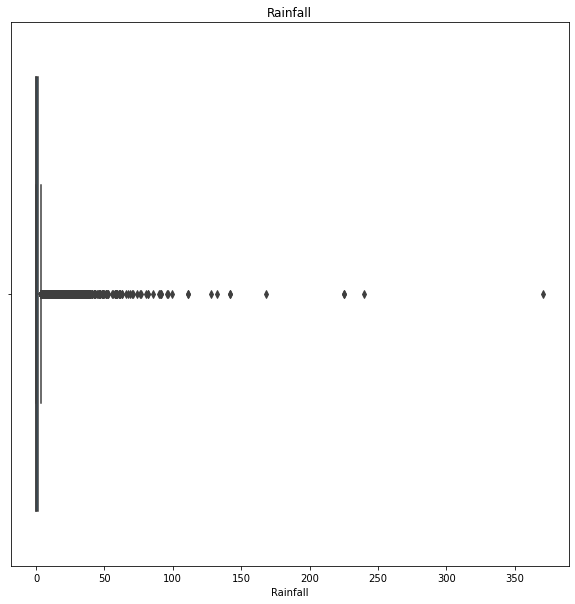

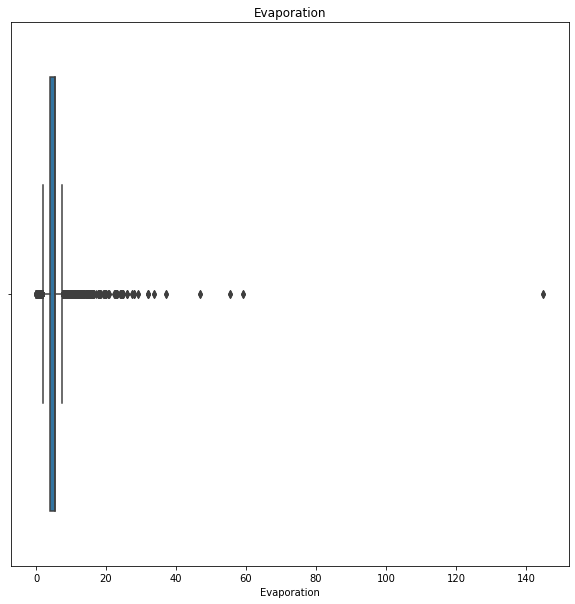

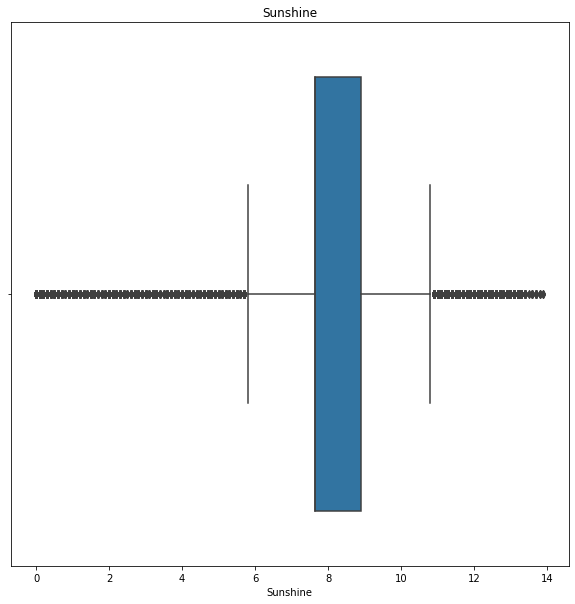

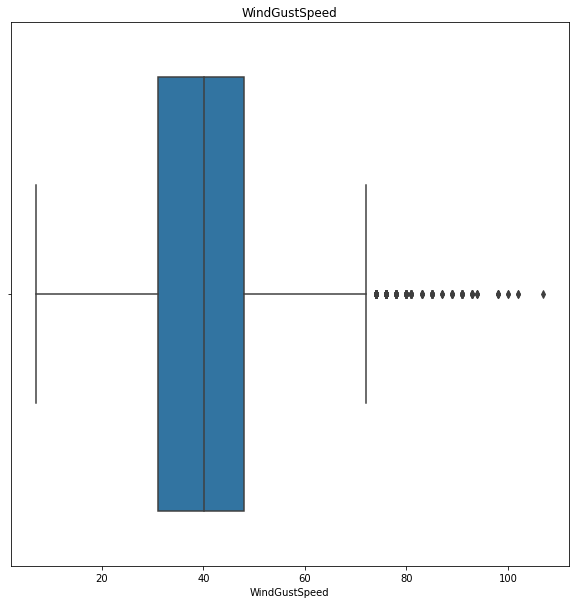

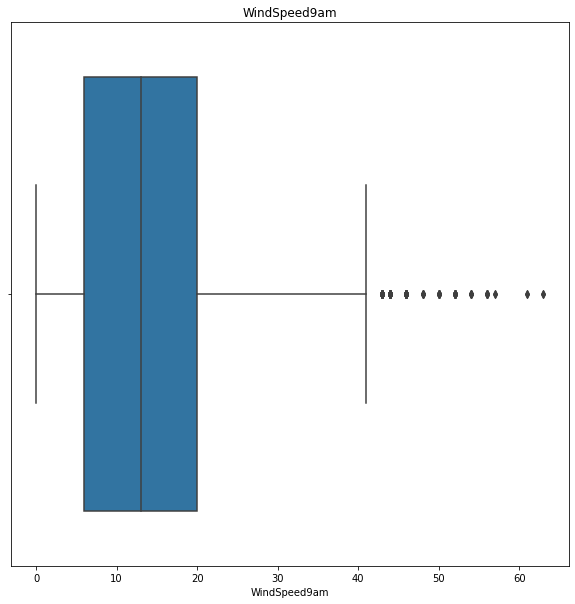

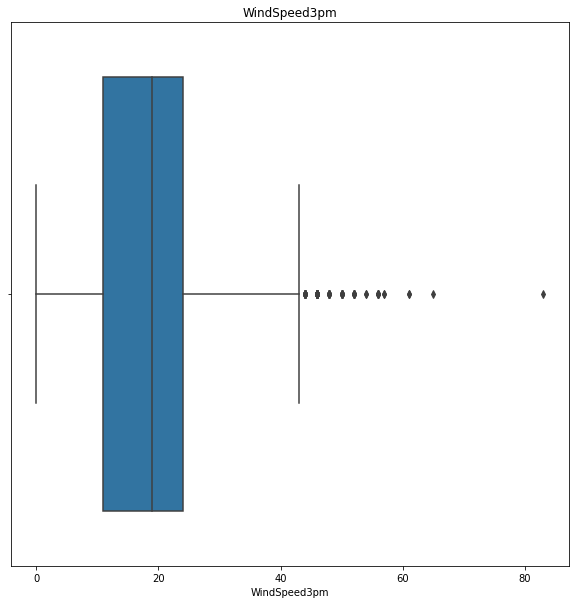

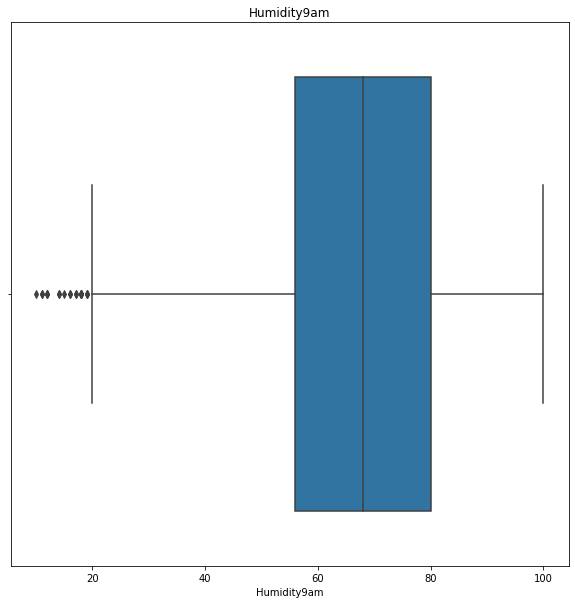

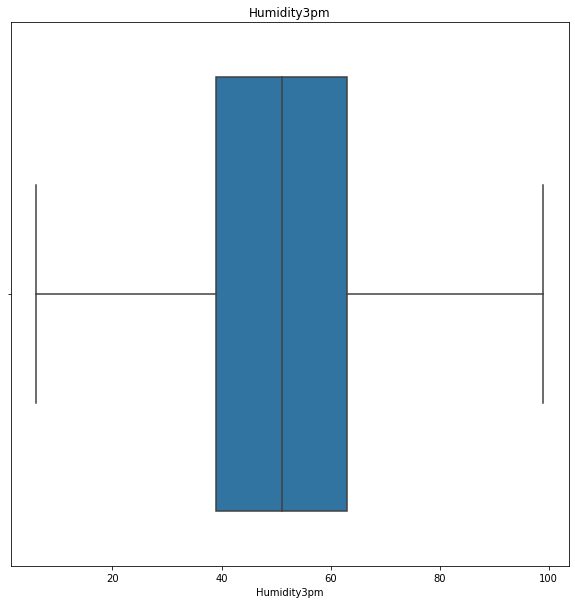

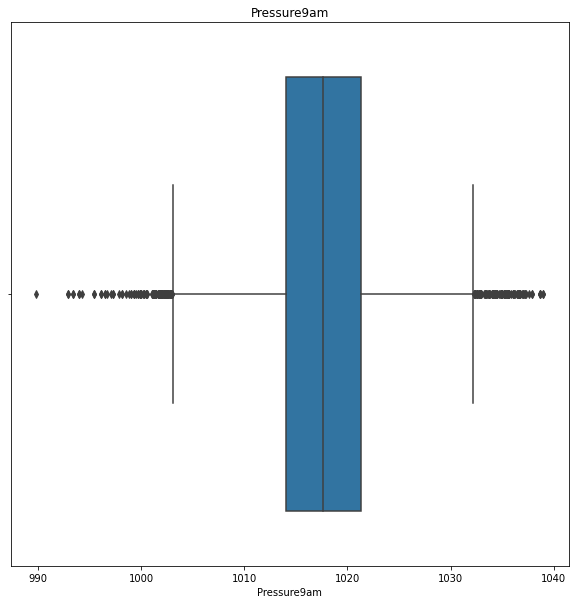

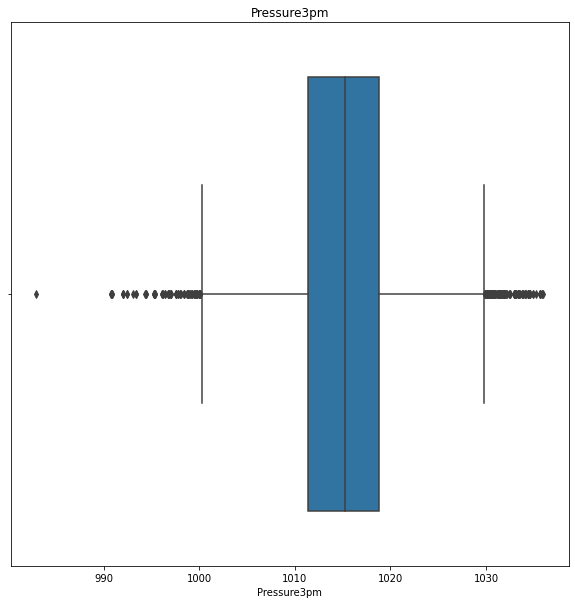

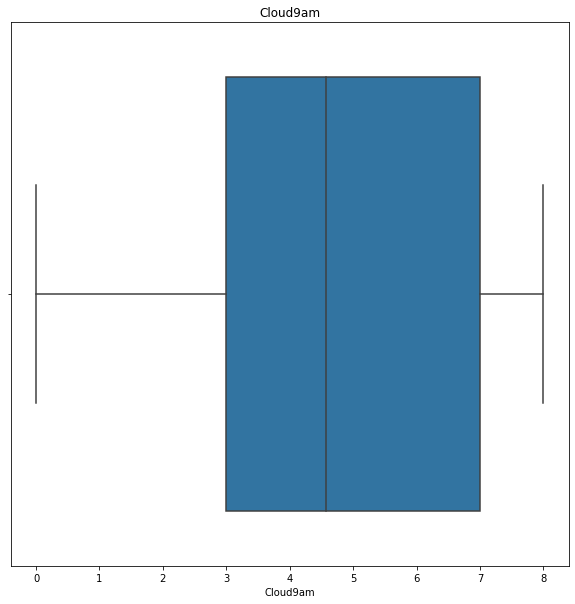

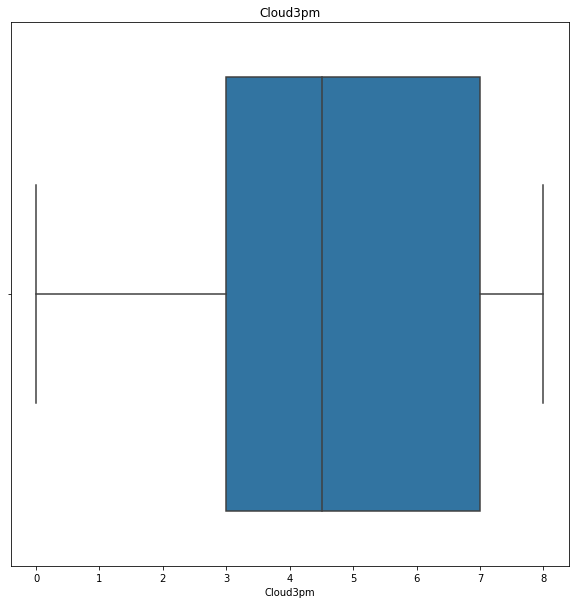

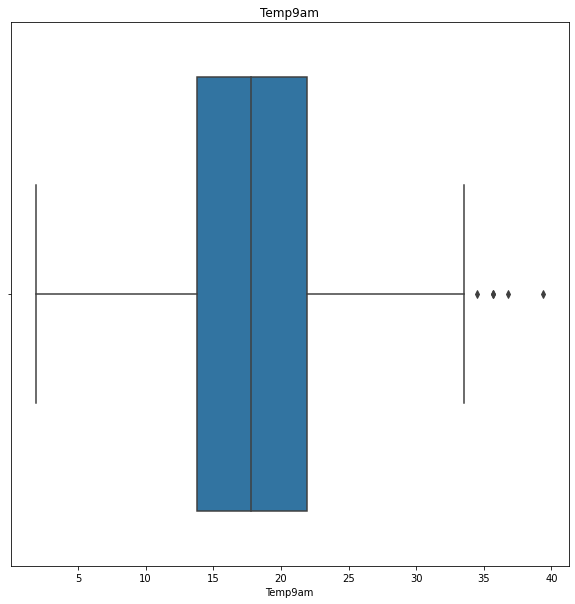

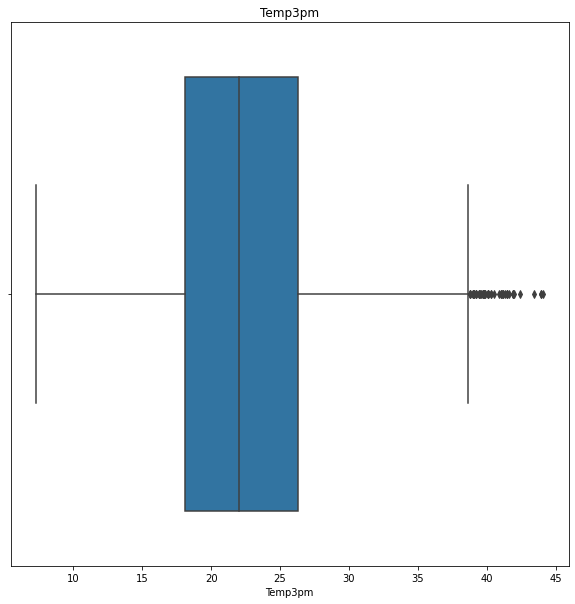

In [115]:
#checking for outliers using Box Plot:

for feature in numerical_feature:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[feature])
    plt.title(feature)
    

In [116]:
# checking for outliers using the statistical formulas:

data[numerical_feature].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

In [117]:
# features which has outliers:

features_with_outliers = [ 'MaxTemp', 'Rainfall', 'Sunshine','Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']

In [118]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

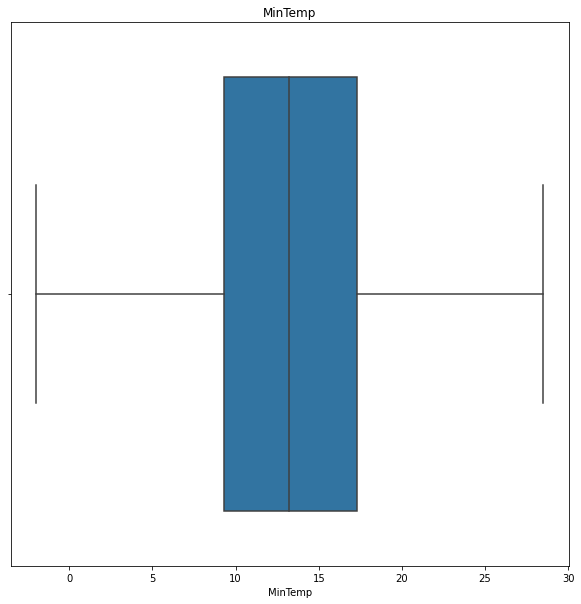

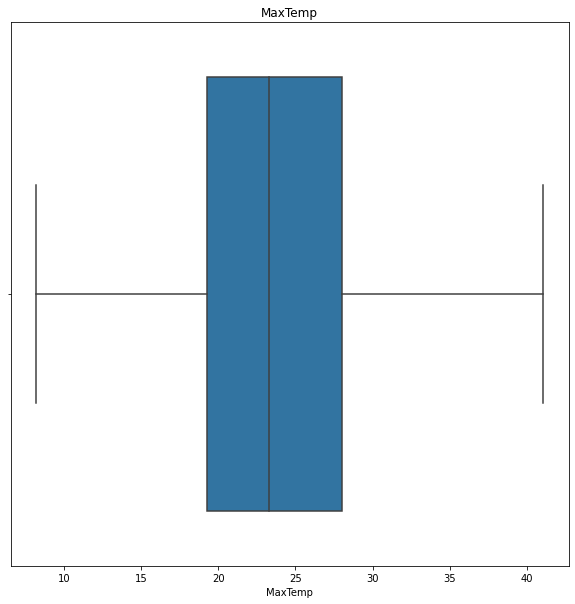

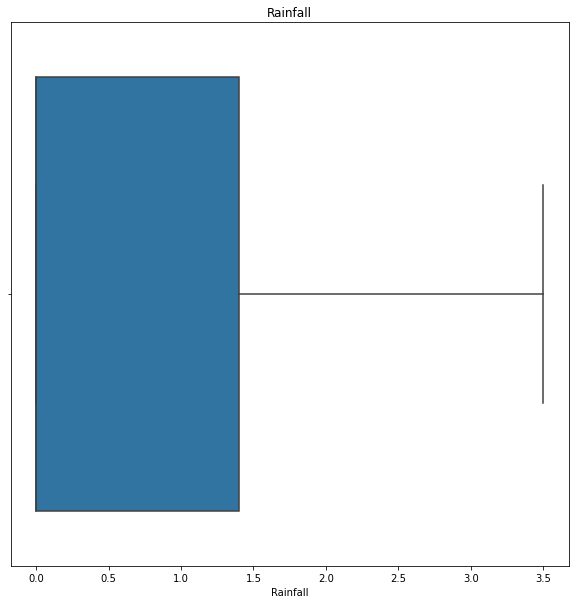

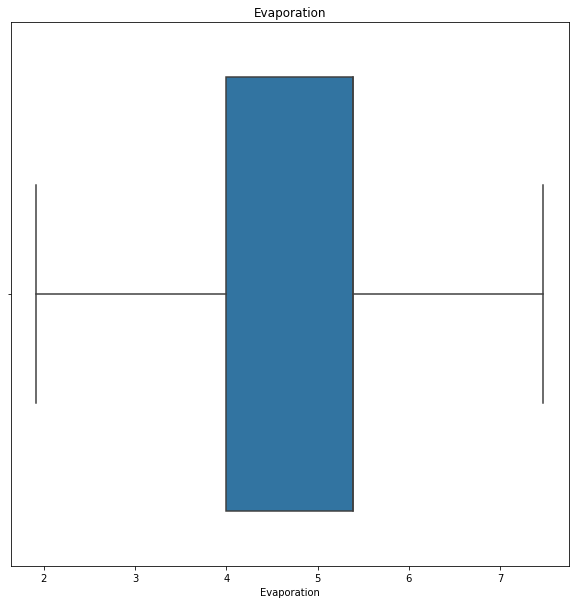

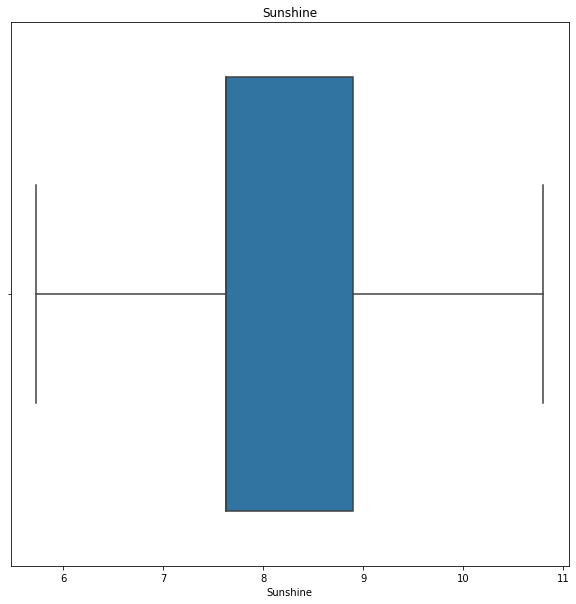

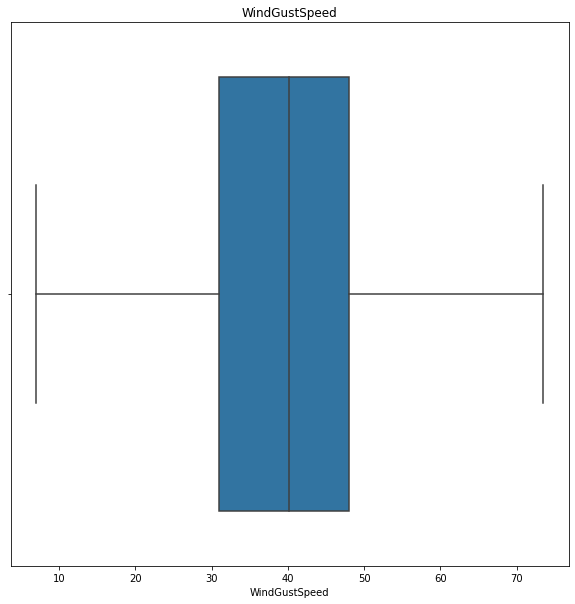

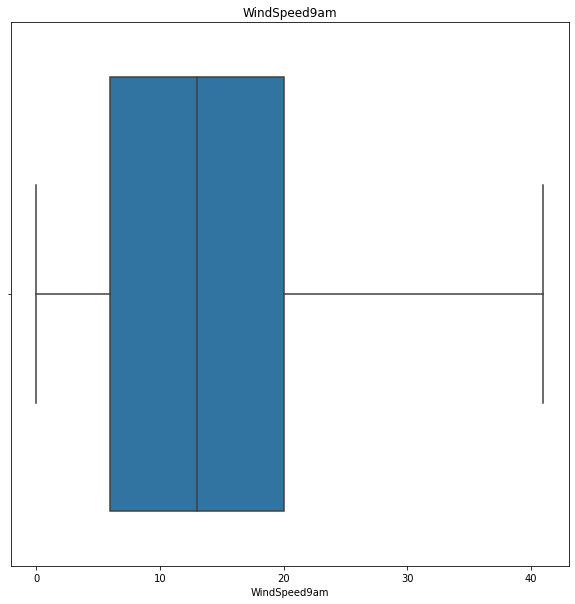

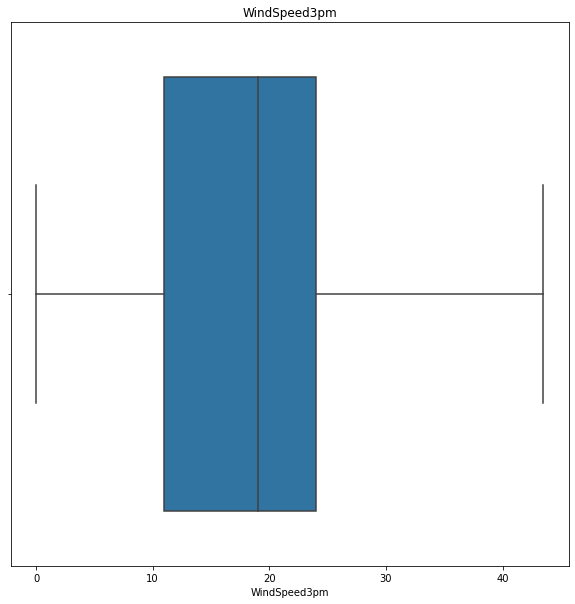

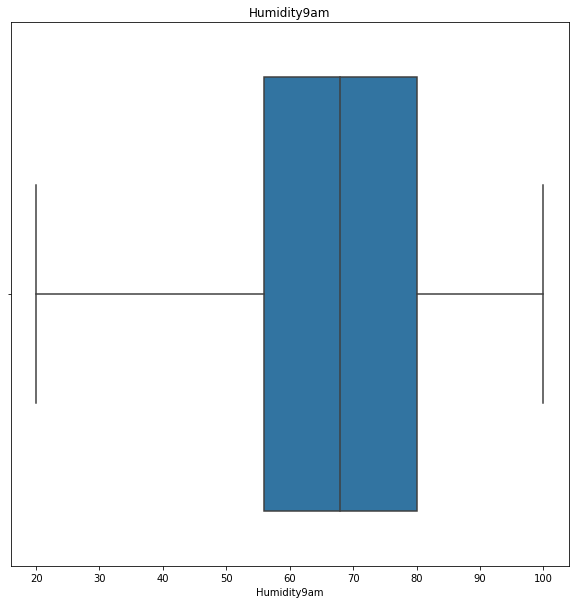

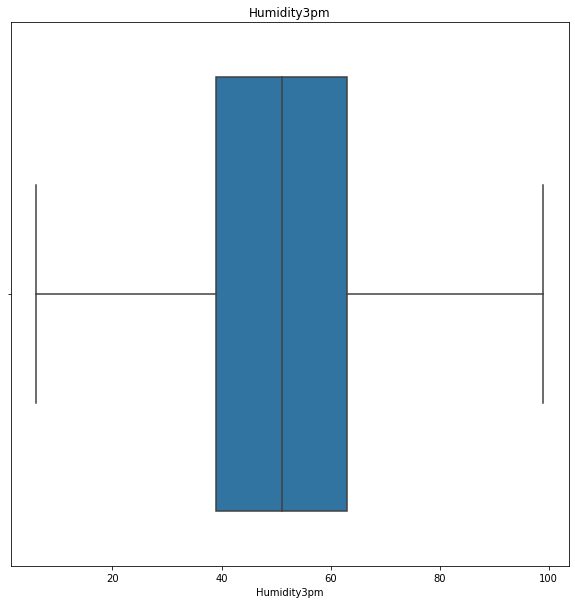

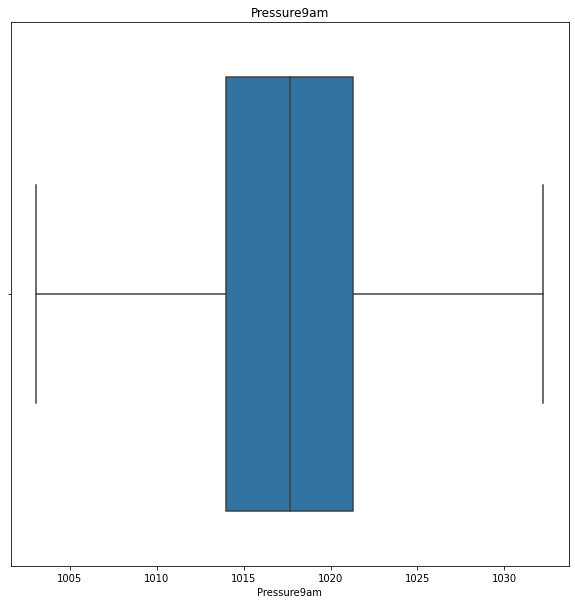

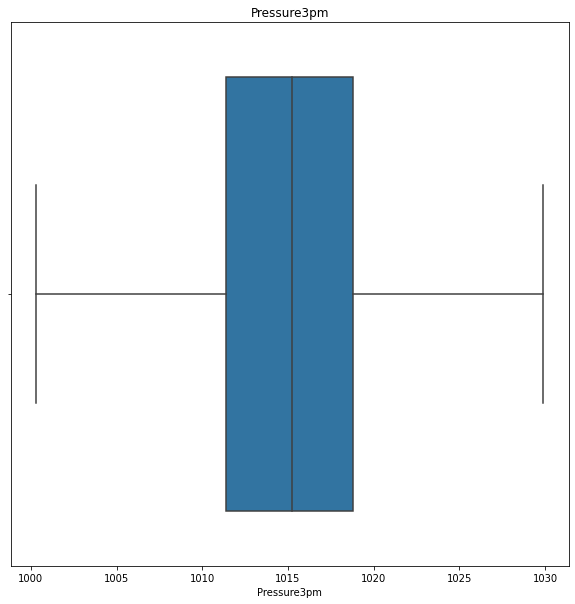

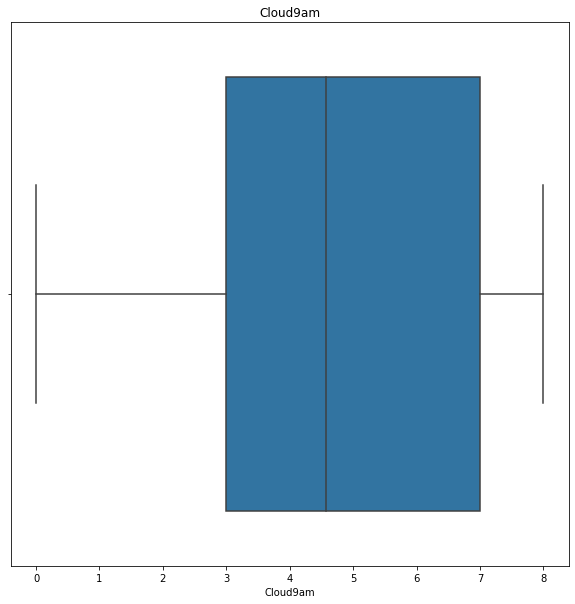

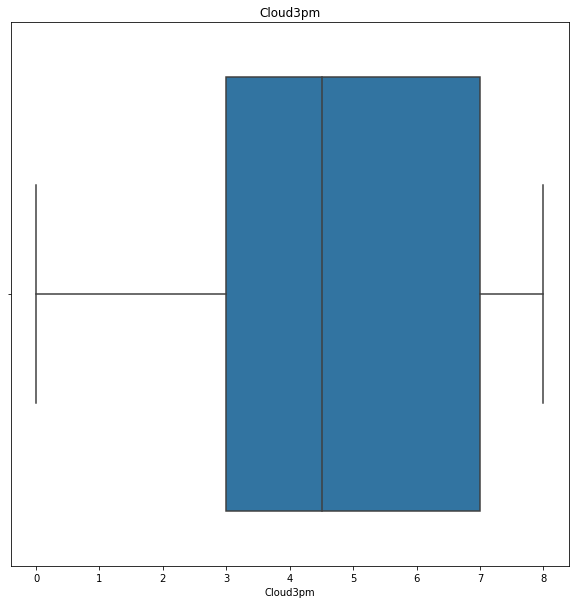

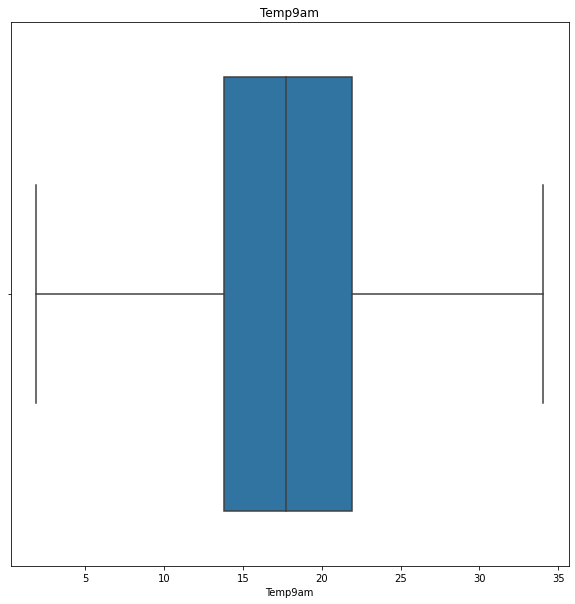

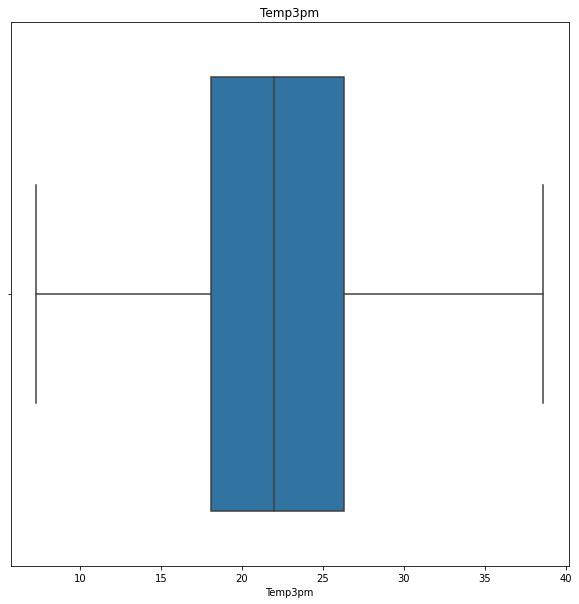

In [119]:
for feature in numerical_feature:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[feature])
    plt.title(feature)

#### now my all outliers has been removed

In [120]:
#Spliting data into input features and label

X = data.drop(['RainTomorrow'],axis=1)
y = data['RainTomorrow']

In [121]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [122]:
etr_model.feature_importances_

array([0.03544093, 0.0319937 , 0.03377933, 0.04426954, 0.02673664,
       0.04208471, 0.03131609, 0.06507477, 0.03473676, 0.03793574,
       0.03806679, 0.04159187, 0.04405978, 0.20424277, 0.03321942,
       0.03921437, 0.03262537, 0.06014945, 0.03094649, 0.03280705,
       0.05970841])

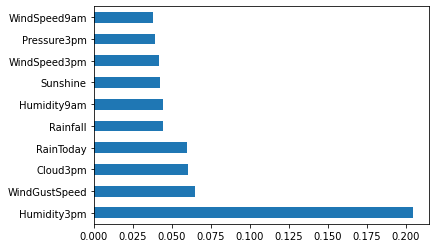

In [123]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [124]:
feature_imp

Location         0.035441
MinTemp          0.031994
MaxTemp          0.033779
Rainfall         0.044270
Evaporation      0.026737
Sunshine         0.042085
WindGustDir      0.031316
WindGustSpeed    0.065075
WindDir9am       0.034737
WindDir3pm       0.037936
WindSpeed9am     0.038067
WindSpeed3pm     0.041592
Humidity9am      0.044060
Humidity3pm      0.204243
Pressure9am      0.033219
Pressure3pm      0.039214
Cloud9am         0.032625
Cloud3pm         0.060149
Temp9am          0.030946
Temp3pm          0.032807
RainToday        0.059708
dtype: float64

### Split Data into Training and Testing Set

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [126]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


### Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
X_train

array([[ 0.06546443,  0.79452605, -0.19718322, ...,  0.39034104,
        -0.16482355, -0.55060959],
       [ 1.65148265,  0.45974688, -0.39413659, ...,  0.05127399,
        -0.50315966, -0.55060959],
       [-1.52055378, -1.34434087, -0.16435766, ..., -0.87669901,
         0.02126131, -0.55060959],
       ...,
       [-0.25173921, -0.76777674, -0.91934558, ..., -0.7160883 ,
        -0.89224619, -0.55060959],
       [ 1.334279  ,  1.07350869,  0.27878743, ...,  0.92571008,
         0.2750134 ,  1.81616888],
       [ 0.38266807, -0.4887941 , -1.52661847, ..., -0.76962521,
        -1.36591675,  1.81616888]])

In [129]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif

Features        vif
0        Location   1.151841
1         MinTemp   8.154022
2         MaxTemp  25.823033
3        Rainfall   5.360761
4     Evaporation   1.457881
5        Sunshine   1.979821
6     WindGustDir   1.579378
7   WindGustSpeed   2.417962
8      WindDir9am   1.339082
9      WindDir3pm   1.466708
10   WindSpeed9am   2.056741
11   WindSpeed3pm   2.002428
12    Humidity9am   4.013186
13    Humidity3pm   5.530402
14    Pressure9am  21.226506
15    Pressure3pm  19.998915
16       Cloud9am   1.987692
17       Cloud3pm   1.856332
18        Temp9am  17.373936
19        Temp3pm  32.906745
20      RainToday   5.116498

#### drop the column which has more then 10 vif value.here MaxTemp,Pressure9am,Pressure3pm,Temp9am,Temp3pm has high value.

In [130]:
X.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

### Model Building

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [132]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(X_train,y_train)
RFC.fit(X_train,y_train)
DTC.fit(X_train,y_train)
SV.fit(X_train,y_train)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

### Accuracy Score for each model

In [133]:
## Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(X_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[1199   87]
 [ 186  213]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1286
           1       0.71      0.53      0.61       399

    accuracy                           0.84      1685
   macro avg       0.79      0.73      0.75      1685
weighted avg       0.83      0.84      0.83      1685



In [134]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(X_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[1236   50]
 [ 118  281]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1286
           1       0.85      0.70      0.77       399

    accuracy                           0.90      1685
   macro avg       0.88      0.83      0.85      1685
weighted avg       0.90      0.90      0.90      1685



In [135]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(X_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[1134  152]
 [ 117  282]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.91      0.88      0.89      1286
           1       0.65      0.71      0.68       399

    accuracy                           0.84      1685
   macro avg       0.78      0.79      0.79      1685
weighted avg       0.85      0.84      0.84      1685



In [136]:
# SV Classifier Model Accuracy
SVpred = SV.predict(X_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[1245   41]
 [ 230  169]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1286
           1       0.80      0.42      0.56       399

    accuracy                           0.84      1685
   macro avg       0.82      0.70      0.73      1685
weighted avg       0.83      0.84      0.82      1685



In [137]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(X_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[1196   90]
 [ 181  218]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1286
           1       0.71      0.55      0.62       399

    accuracy                           0.84      1685
   macro avg       0.79      0.74      0.76      1685
weighted avg       0.83      0.84      0.83      1685



### Model Cross Validation

In [138]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,X,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,X,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,X,y,cv=5).mean())


# SV Classifier
print("SV Classifier:",cvs(SV,X,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,X,y,cv=5).mean())

Decision Tree Classifier: 0.7858753709198812
Logistic Regression: 0.8229080118694363
 Random Forest Classifier: 0.8516320474777448
SV Classifier: 0.8239762611275966
K Nearest Neighnors Classifier: 0.8024925816023739


## ROC AUC Scores

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))


#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))

Decision Tree Classifier: 0.7942854804195558
Logistic Regression: 0.7330914767478572
Random Forest Classifier: 0.8326902013977401
SV Classifier: 0.695838546599781
K Nearest Neighbors Classifier: 0.7381907334432504


### Random Forest Classifier is the best model for the dataset with score 82%

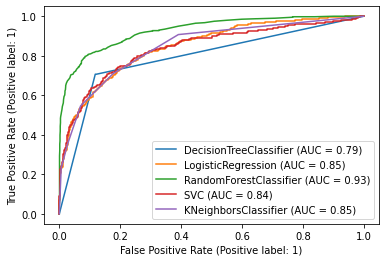

In [140]:
#ROC curve
disp = plot_roc_curve(DTC,X_test,y_test)
mod = [LOGR,RFC,SV,KNN]

for i in mod:
    plot_roc_curve(i,X_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

## above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.93

## Hyper parameter tuning

In [141]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
Gridcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
Gridcv.fit(X_train,y_train)

KeyboardInterrupt: ignored

# now let's start Regression problem which has target RainFall.

In [1]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.shape

(8425, 23)

In [4]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.describe(include='all')

Date   Location      MinTemp      MaxTemp     Rainfall  \
count         8425       8425  8350.000000  8365.000000  8185.000000   
unique        3004         12          NaN          NaN          NaN   
top     2011-01-31  Melbourne          NaN          NaN          NaN   
freq             5       1622          NaN          NaN          NaN   
mean           NaN        NaN    13.193305    23.859976     2.805913   
std            NaN        NaN     5.403596     6.136408    10.459379   
min            NaN        NaN    -2.000000     8.200000     0.000000   
25%            NaN        NaN     9.200000    19.300000     0.000000   
50%            NaN        NaN    13.300000    23.300000     0.000000   
75%            NaN        NaN    17.400000    28.000000     1.000000   
max            NaN        NaN    28.500000    45.500000   371.000000   

        Evaporation     Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   4913.000000  4431.000000        7434    7434.000000       7596  ...   
unique          NaN          NaN          16            NaN         16  ...   
top             NaN          NaN           N            NaN          N  ...   
freq            NaN          NaN         713            NaN        906  ...   
mean       5.389395     7.632205         NaN      40.174469        NaN  ...   
std        5.044484     3.896235         NaN      14.665721        NaN  ...   
min        0.000000     0.000000         NaN       7.000000        NaN  ...   
25%        2.600000     4.750000         NaN      30.000000        NaN  ...   
50%        4.600000     8.700000         NaN      39.000000        NaN  ...   
75%        7.000000    10.700000         NaN      50.000000        NaN  ...   
max      145.000000    13.900000         NaN     107.000000        NaN  ...   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count   8366.000000  8323.000000  7116.000000  7113.000000  6004.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      67.822496    51.249790  1017.640233  1015.236075     4.566622   
std       16.833283    18.423774     6.828699     6.766681     2.877658   
min       10.000000     6.000000   989.800000   982.900000     0.000000   
25%       56.000000    39.000000  1013.000000  1010.400000     1.000000   
50%       68.000000    51.000000  1017.700000  1015.300000     5.000000   
75%       80.000000    63.000000  1022.300000  1019.800000     7.000000   
max      100.000000    99.000000  1039.000000  1036.000000     8.000000   

           Cloud3pm      Temp9am      Temp3pm  RainToday  RainTomorrow  
count   5970.000000  8369.000000  8329.000000       8185          8186  
unique          NaN          NaN          NaN          2             2  
top             NaN          NaN          NaN         No            No  
freq            NaN          NaN          NaN       6195          6195  
mean       4.503183    17.762015    22.442934        NaN           NaN  
std        2.731659     5.627035     5.980020        NaN           NaN  
min        0.000000     1.900000     7.300000        NaN           NaN  
25%        2.000000    13.800000    18.000000        NaN           NaN  
50%        5.000000    17.800000    21.900000        NaN           NaN  
75%        7.000000    21.900000    26.400000        NaN           NaN  
max        8.000000    39.400000    44.100000        NaN           NaN  

[11 rows x 23 columns]

## Data Cleaning

#### here is present included data describe of both continoues and catgorical column.we can see here very null values and missing values are present

In [7]:
# firstly null values fill
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count()",format(len(numerical_feature)))
print("Discreate Feature Count()",format(len(discrete_feature)))
print("Continous Feature Count()",format(len(continous_feature)))
print("Categorical Feature Count()",format(len(categorical_feature)))

Numerical Features Count() 16
Discreate Feature Count() 2
Continous Feature Count() 14
Categorical Feature Count() 7


In [8]:
df['Cloud9am'].sample(df['Cloud9am'].isnull().sum(),random_state=0)

1220    1.0
532     NaN
5998    1.0
7707    6.0
509     8.0
       ... 
7310    0.0
3251    8.0
4632    6.0
7911    6.0
898     8.0
Name: Cloud9am, Length: 2421, dtype: float64

In [9]:
df['Cloud9am'].isnull().sum()

2421

In [10]:
df['Cloud9am'].dropna().sample(df['Cloud9am'].isnull().sum(),random_state=0)

6507    1.0
1931    2.0
5852    8.0
1018    0.0
1940    0.0
       ... 
1700    0.0
4412    1.0
2010    8.0
2867    1.0
5858    6.0
Name: Cloud9am, Length: 2421, dtype: float64

In [11]:
# these are catgorical data fill missing values with mode method
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
# these are continous data fill by "mean" value
columns_nan = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [14]:
for col in columns_nan:
    df[col].fillna(df[col].mean(), inplace=True)

In [15]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Build Regression model

# Visualization

### Dist plot

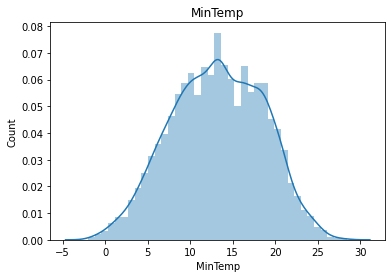

<Figure size 1080x1080 with 0 Axes>

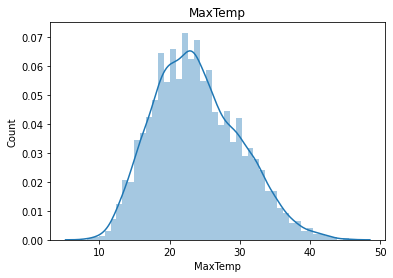

<Figure size 1080x1080 with 0 Axes>

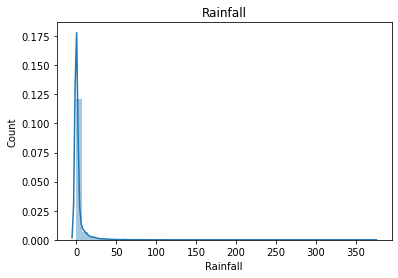

<Figure size 1080x1080 with 0 Axes>

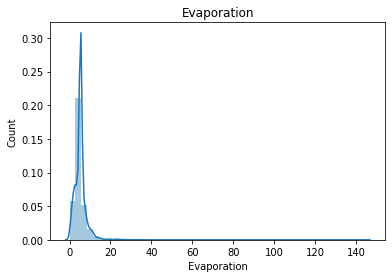

<Figure size 1080x1080 with 0 Axes>

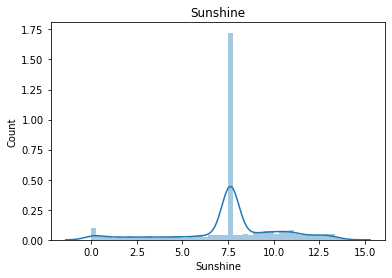

<Figure size 1080x1080 with 0 Axes>

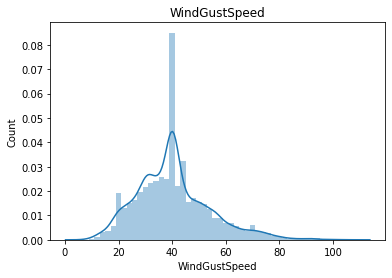

<Figure size 1080x1080 with 0 Axes>

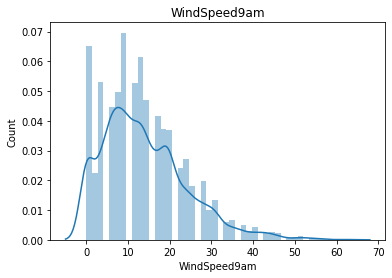

<Figure size 1080x1080 with 0 Axes>

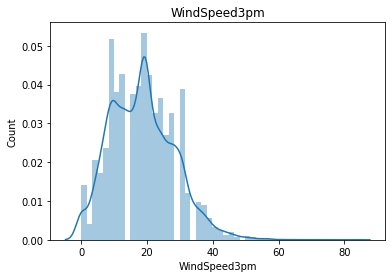

<Figure size 1080x1080 with 0 Axes>

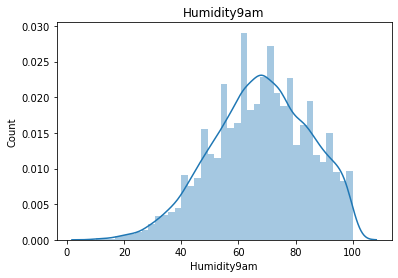

<Figure size 1080x1080 with 0 Axes>

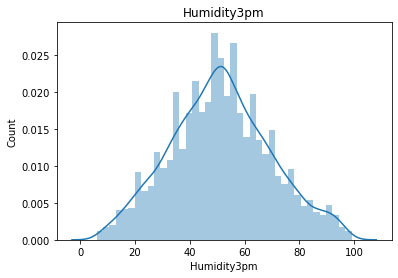

<Figure size 1080x1080 with 0 Axes>

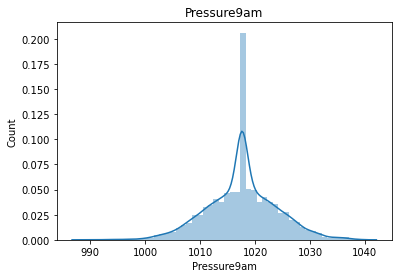

<Figure size 1080x1080 with 0 Axes>

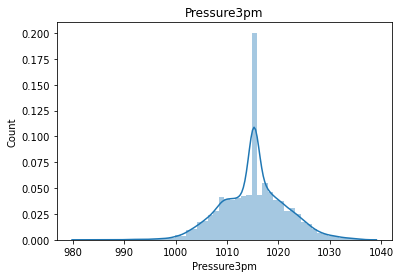

<Figure size 1080x1080 with 0 Axes>

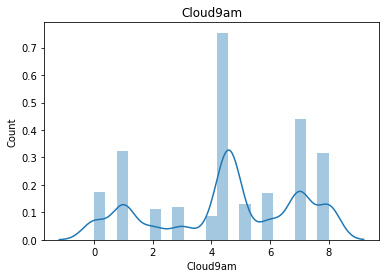

<Figure size 1080x1080 with 0 Axes>

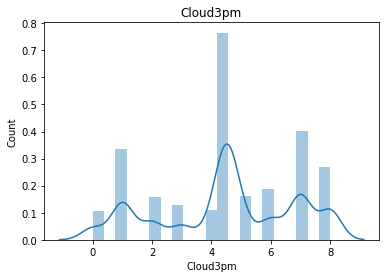

<Figure size 1080x1080 with 0 Axes>

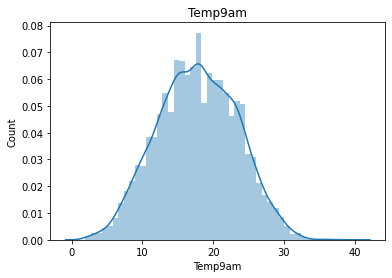

<Figure size 1080x1080 with 0 Axes>

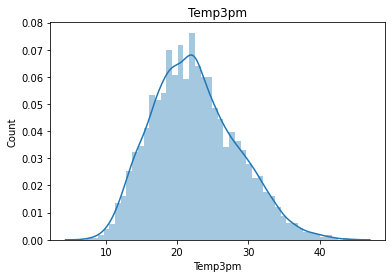

<Figure size 1080x1080 with 0 Axes>

In [17]:
for feature in columns_nan:
    df_c = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

### PairPlot

<Figure size 1080x720 with 0 Axes>

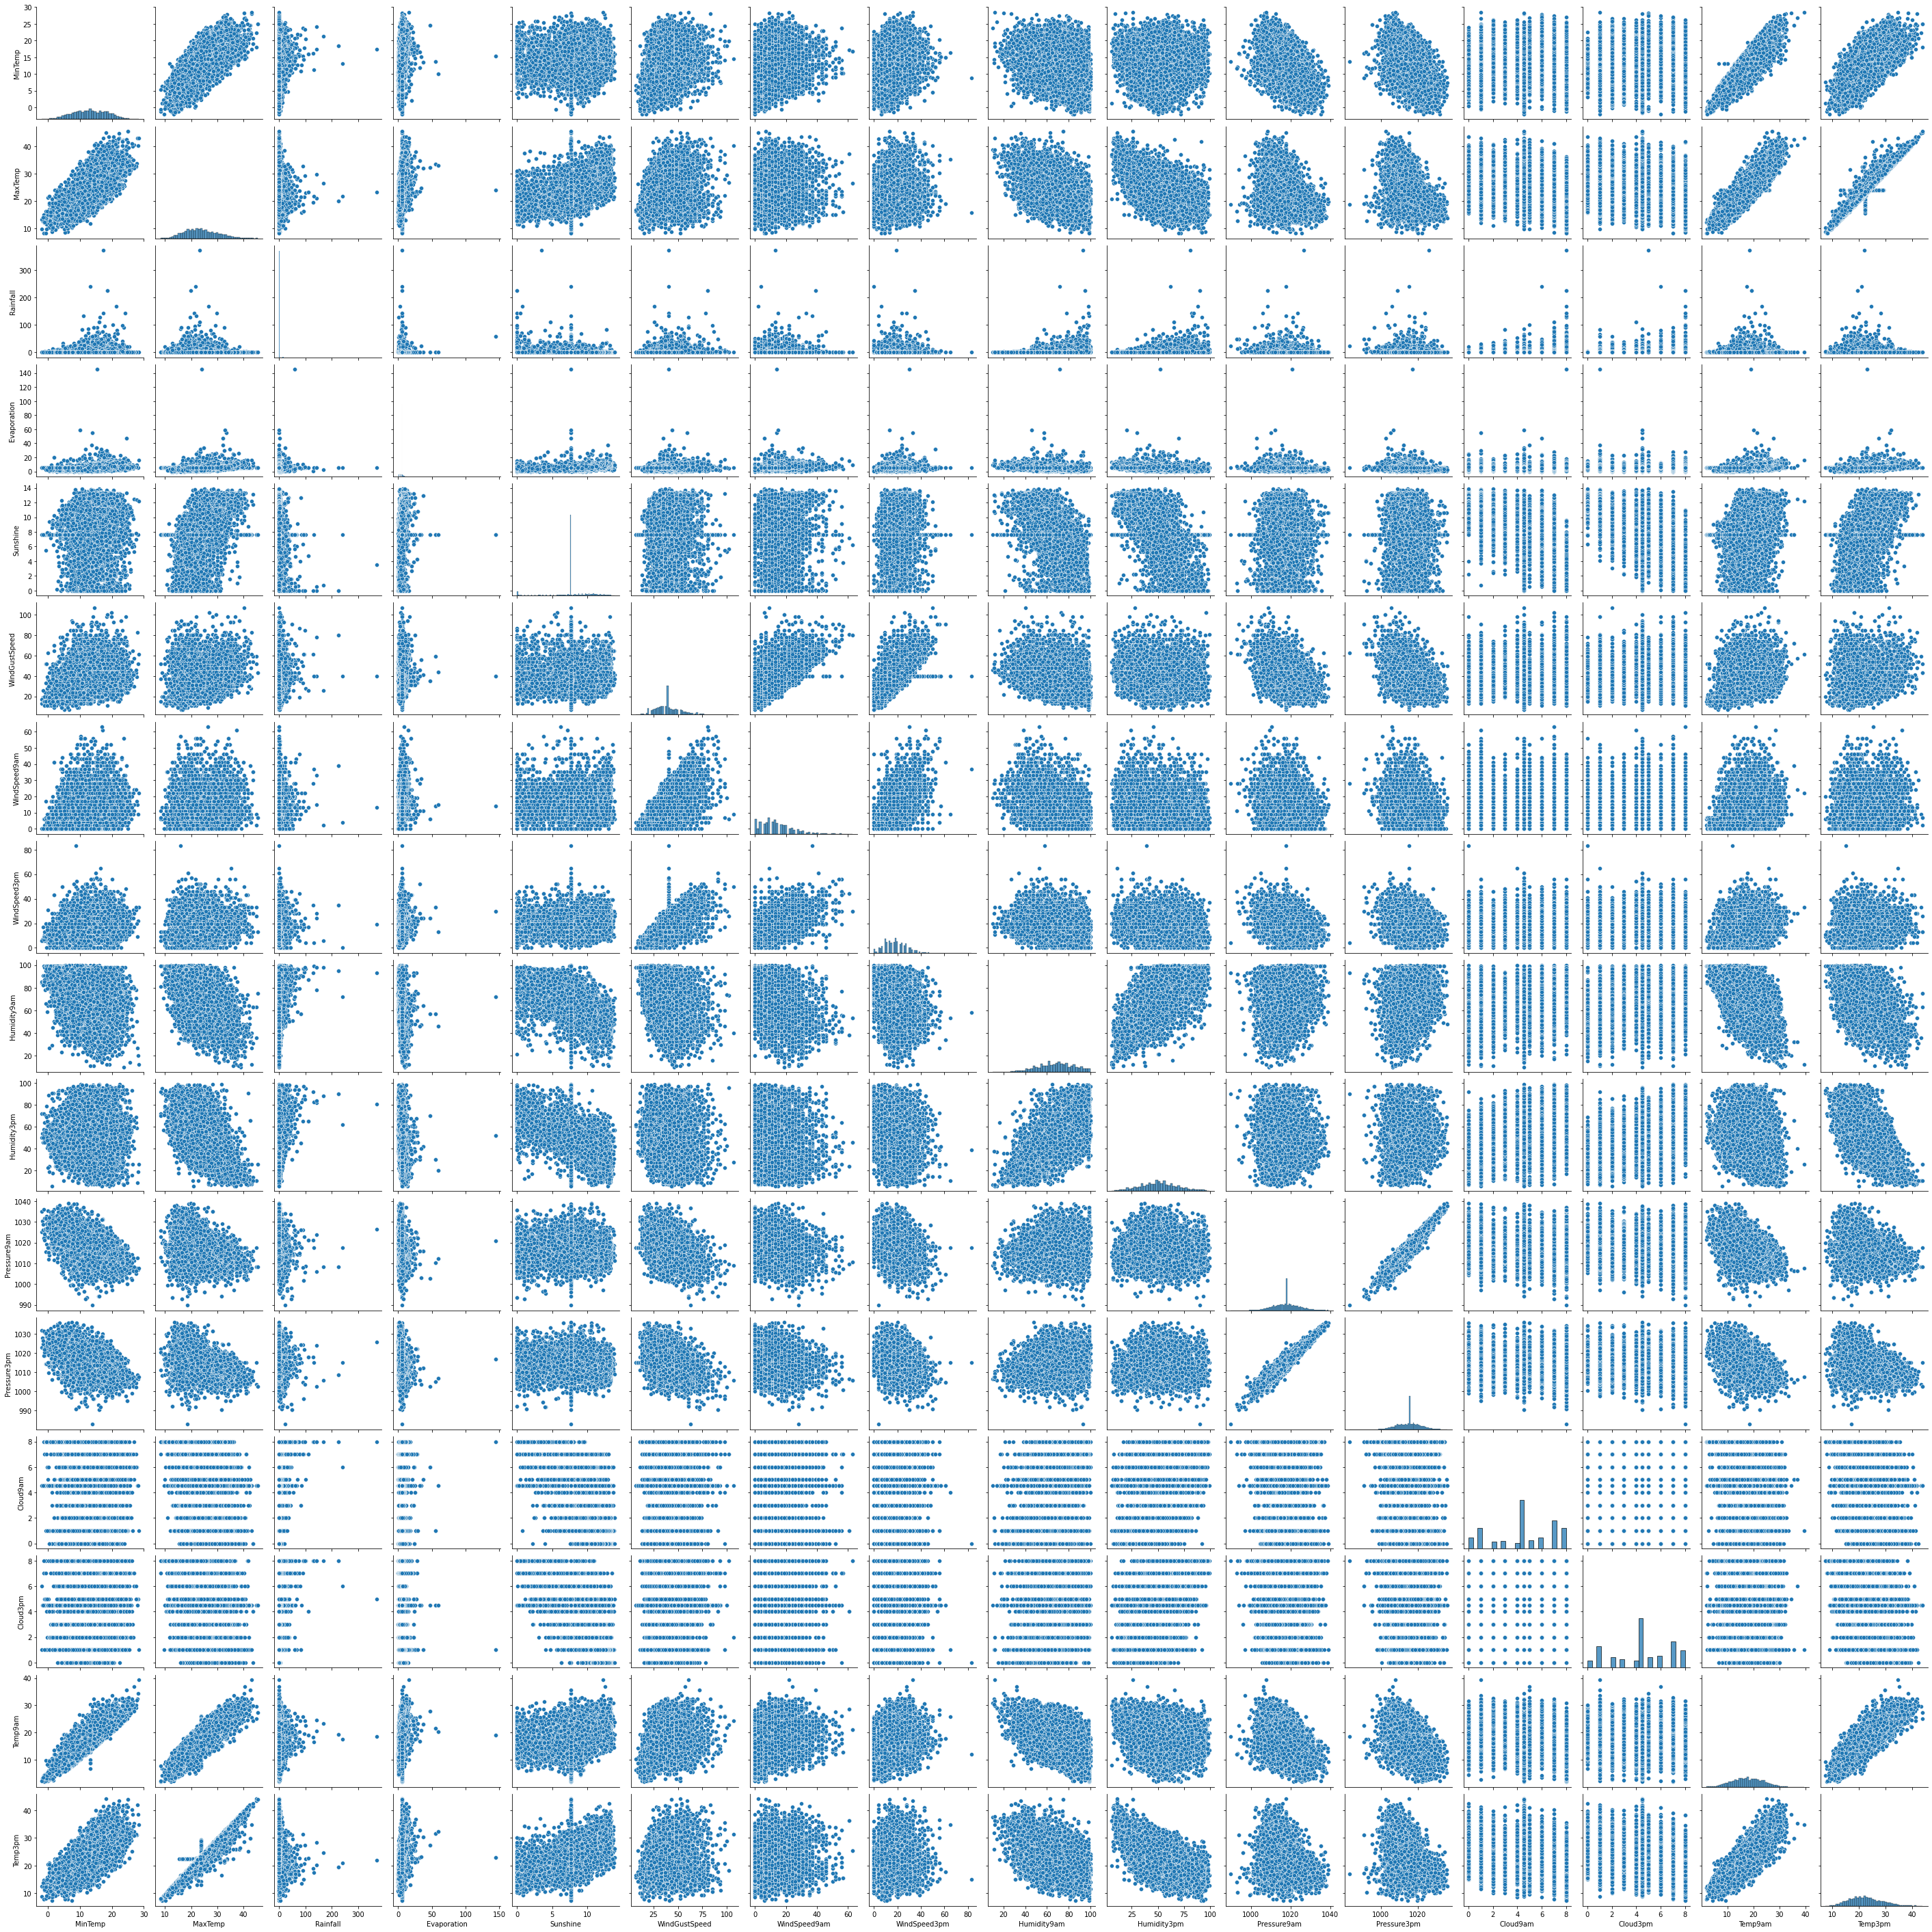

In [18]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

### CountPlot

In [19]:
categorical_column = df[['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].copy()

In [20]:
categorical_column.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

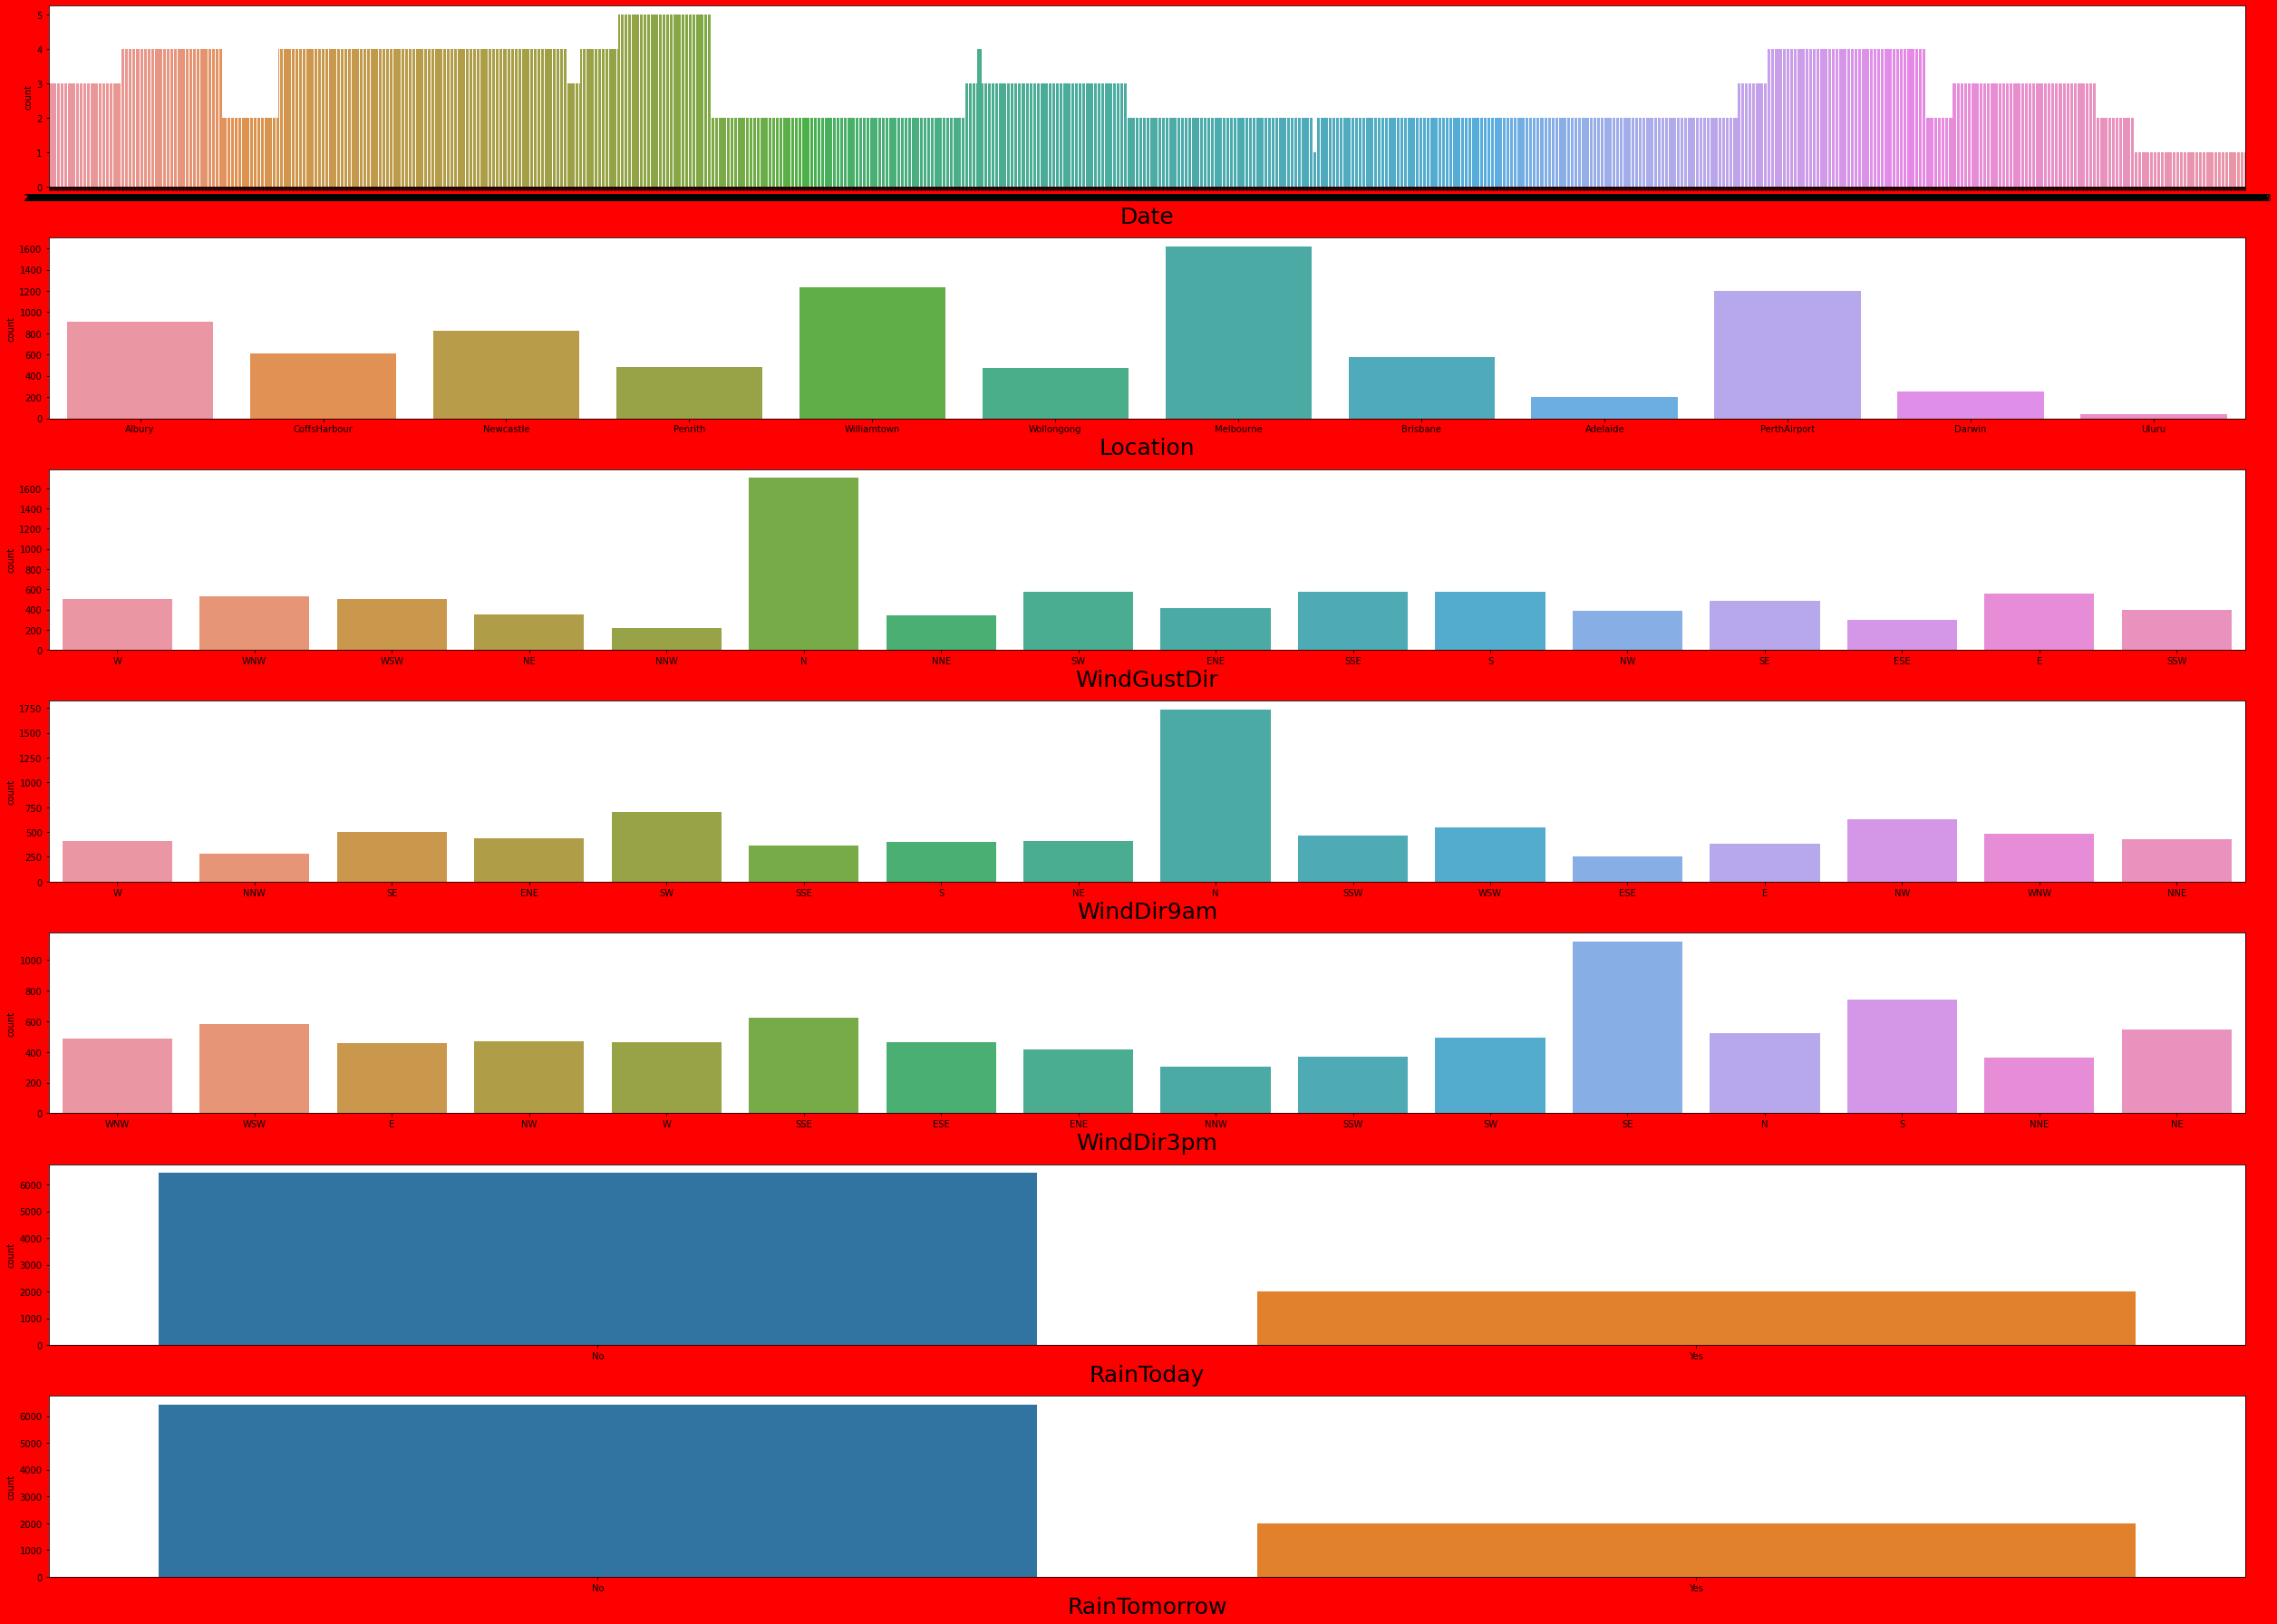

In [21]:
# visualizing data distribution in every column
plt.figure(figsize=(35,25), facecolor='red')
plotnumber = 1

for column in categorical_column:
    if plotnumber<=7:   # there are 7 column is the given data
        ax = plt.subplot(7,1,plotnumber)
        sns.countplot(categorical_column[column])
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

### here visualization part is end

## EDA

In [22]:
df['Rainfall'].value_counts()

0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [23]:
# let's find the unique value

for feature in categorical_feature:
    print("Cardinality(no. of unique values) of {} are: {}".format(feature,len(df[feature].unique())))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 16
Cardinality(no. of unique values) of WindDir9am are: 16
Cardinality(no. of unique values) of WindDir3pm are: 16
Cardinality(no. of unique values) of RainToday are: 2
Cardinality(no. of unique values) of RainTomorrow are: 2


In [24]:
# Type conversion of Date Column to datetime type:

df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [25]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop('Date', axis = 1, inplace = True)

In [26]:
df.head(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   
3   Albury      9.2     28.0       0.0     5.389395  7.632205          NE   
4   Albury     17.5     32.3       1.0     5.389395  7.632205           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.503183   
1           44.0        NNW        WSW  ...       1007.8  4.566622  4.503183   
2           46.0          W        WSW  ...       1008.7  4.566622  2.000000   
3           24.0         SE          E  ...       1012.8  4.566622  4.503183   
4           41.0        ENE         NW  ...       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

## Encoding Technique

In [27]:
df['RainTomorrow']=pd.get_dummies(df['RainTomorrow'],drop_first=True)
df['RainToday']=pd.get_dummies(df['RainToday'],drop_first=True)

In [28]:
df.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000  4.503183   
1           44.0        NNW        WSW  ...       1007.8  4.566622  4.503183   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  

[2 rows x 25 columns]

In [29]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [30]:
df['Location']= labelencoder.fit_transform(df['Location'])
df['WindGustDir']= labelencoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= labelencoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= labelencoder.fit_transform(df['WindDir3pm'])

In [31]:
df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday']]

Location  WindGustDir  WindDir9am  WindDir3pm  RainTomorrow  RainToday
0            1           13          13          14             0          0
1            1           14           6          15             0          0
2            1           15          13          15             0          0
3            1            4           9           0             0          0
4            1           13           1           7             0          0
...        ...          ...         ...         ...           ...        ...
8420         9            0           9           1             0          0
8421         9            6           9           3             0          0
8422         9            3           9          14             0          0
8423         9            9          10           3             0          0
8424         9            3           2           2             0          0

[8425 rows x 6 columns]

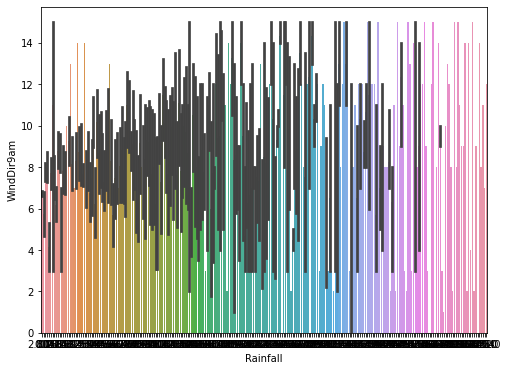

In [32]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'Rainfall', y = 'WindDir9am', data = df)

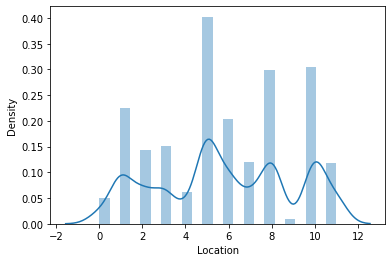

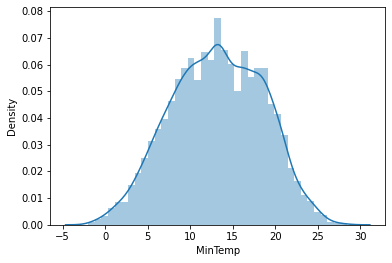

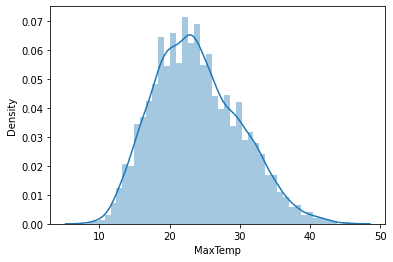

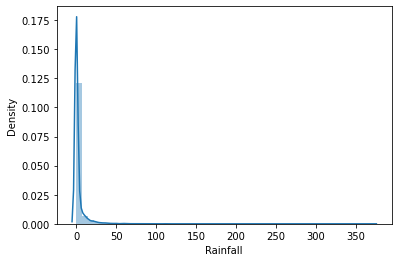

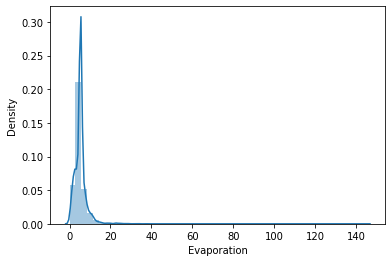

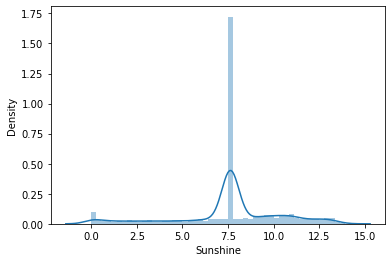

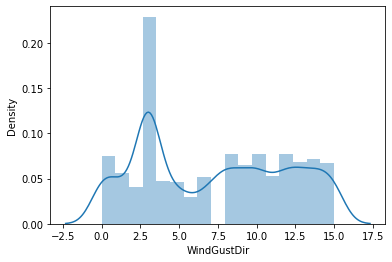

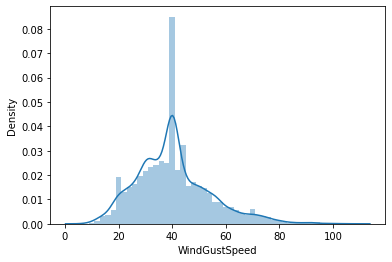

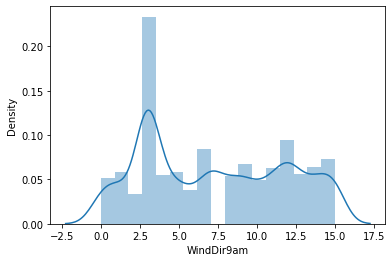

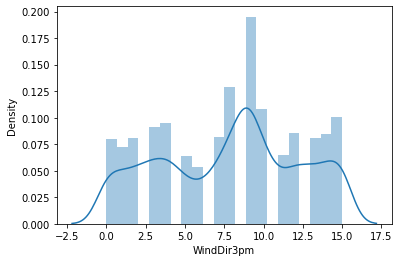

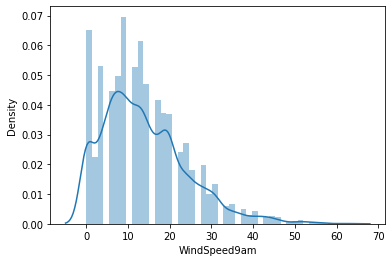

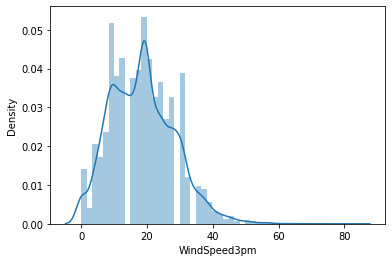

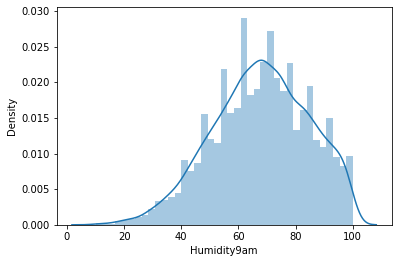

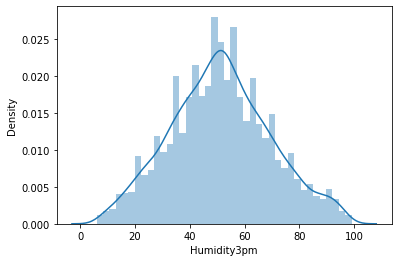

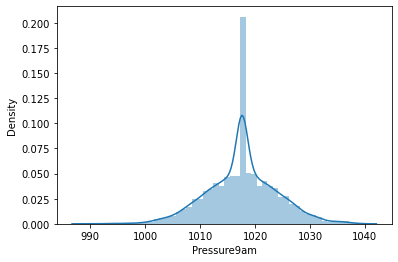

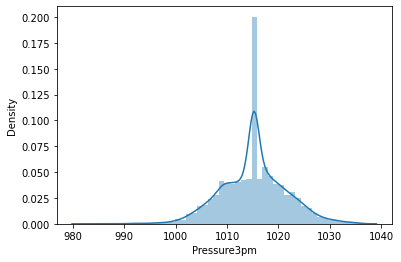

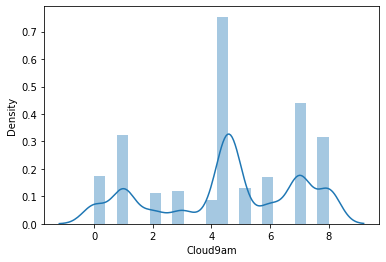

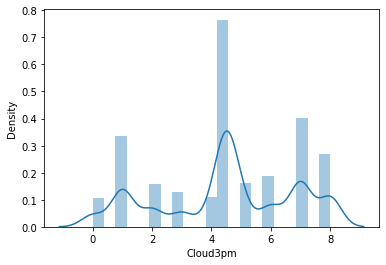

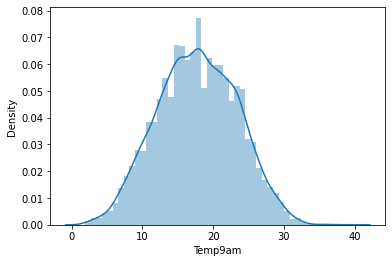

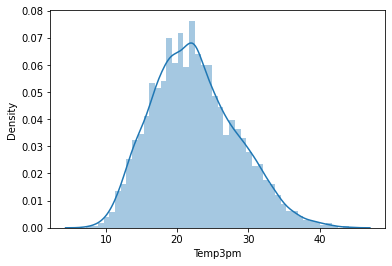

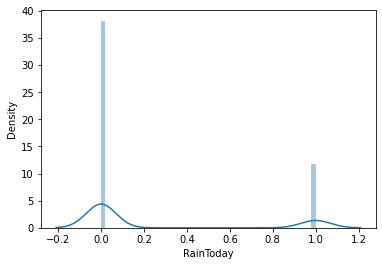

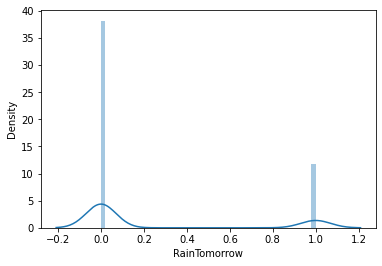

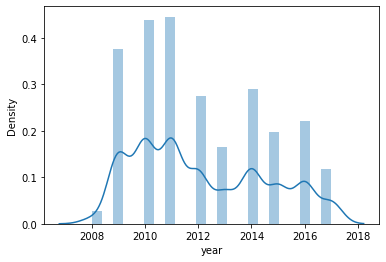

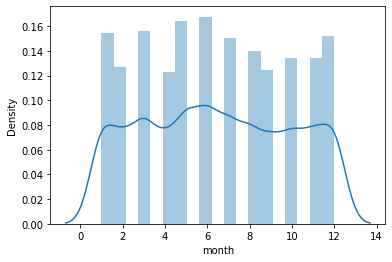

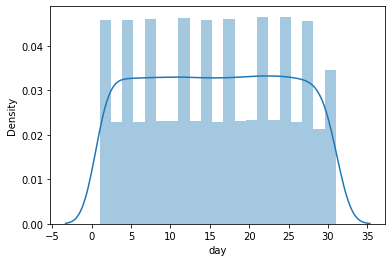

In [33]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

## Correlation and skewness

In [34]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
day             -0.013760
month           -0.012244
Temp9am         -0.007083
year             0.006435
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

#### no any column is highly correlated to target column.

## HeatMap

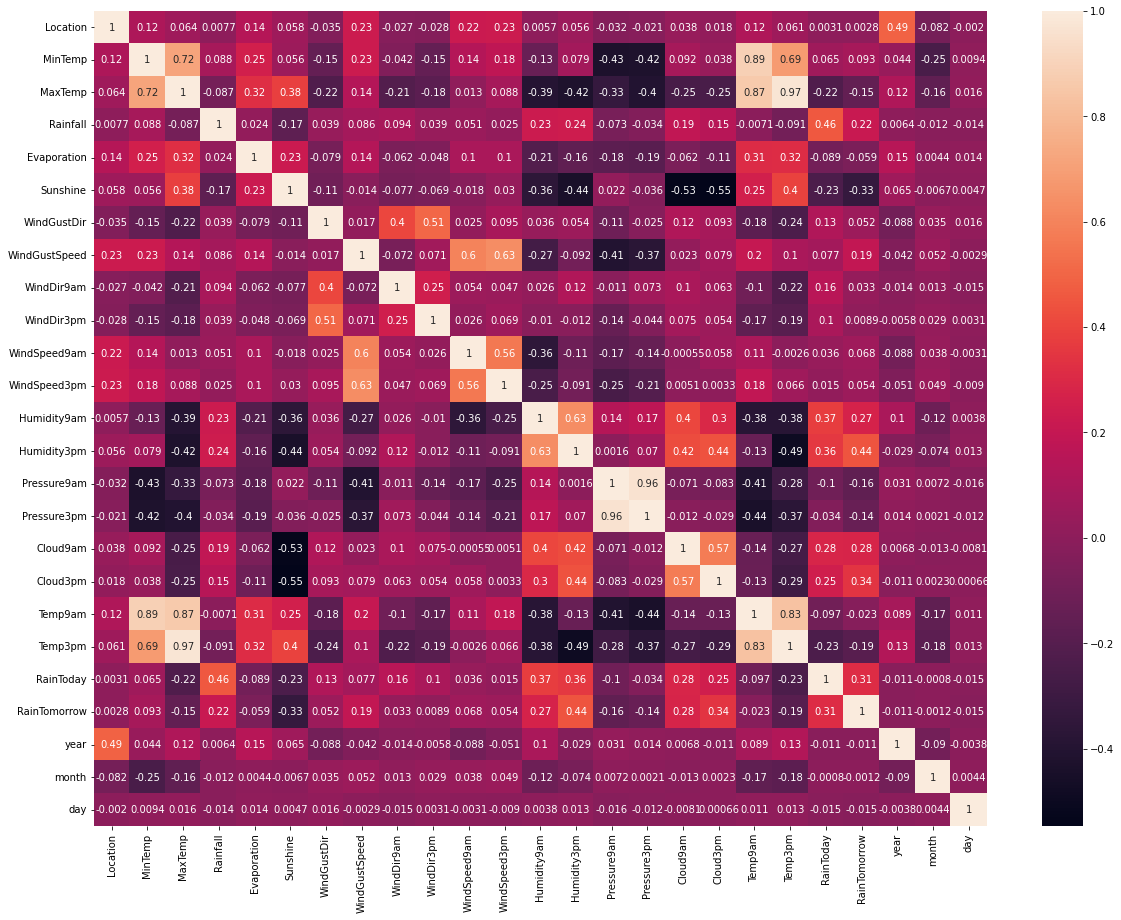

In [35]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

#### some column are highly coreelated to each other so remove this column apply VIF procedure

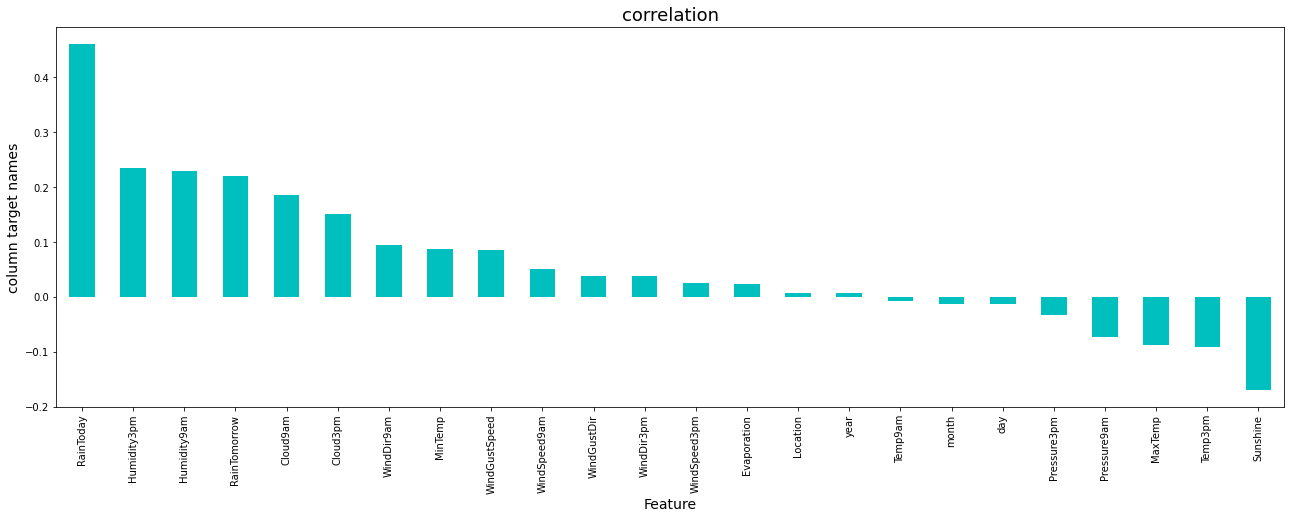

In [36]:
plt.figure(figsize=(22,7))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#### Rain Today is highly correlated to target column but Location, Day, Month, year are very less correlated to target as well as each other

## Checking outliers and skewness

In [37]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

In [38]:
df.drop(['day','month','year'],axis=1,inplace=True)

### Box plot(checking outliers)

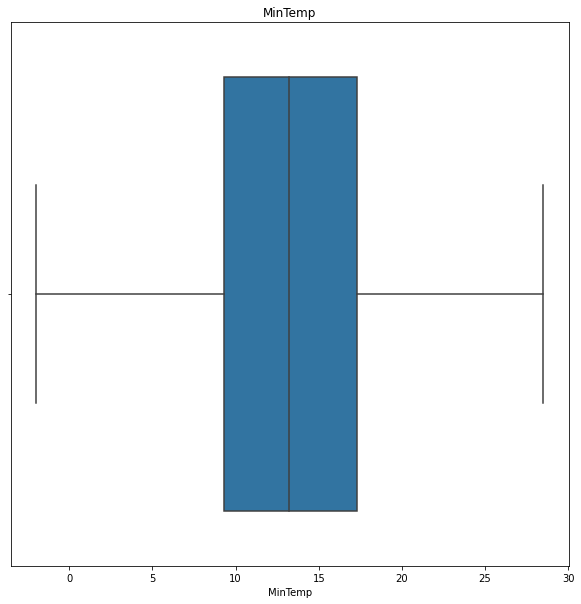

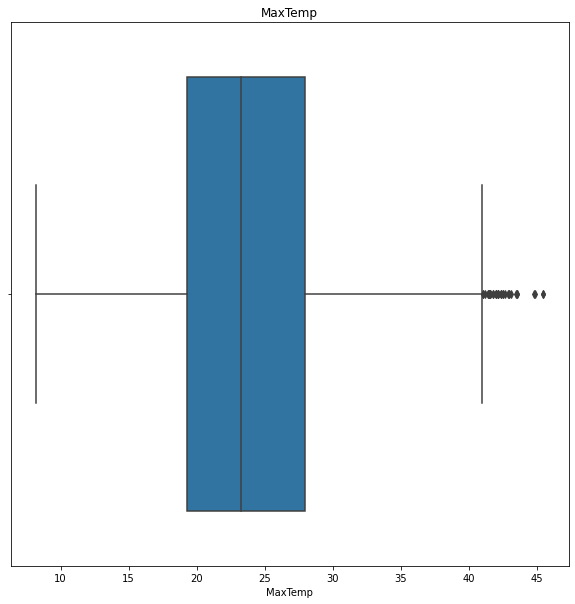

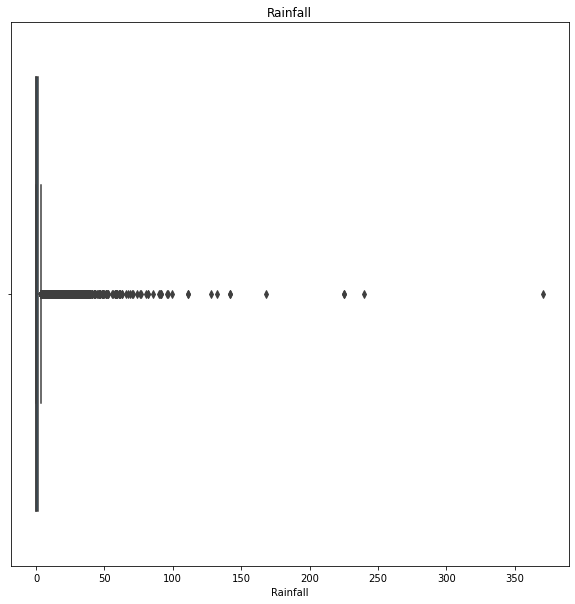

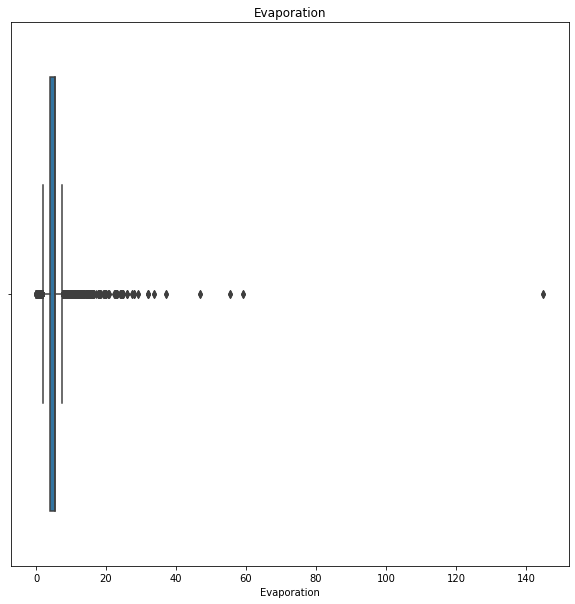

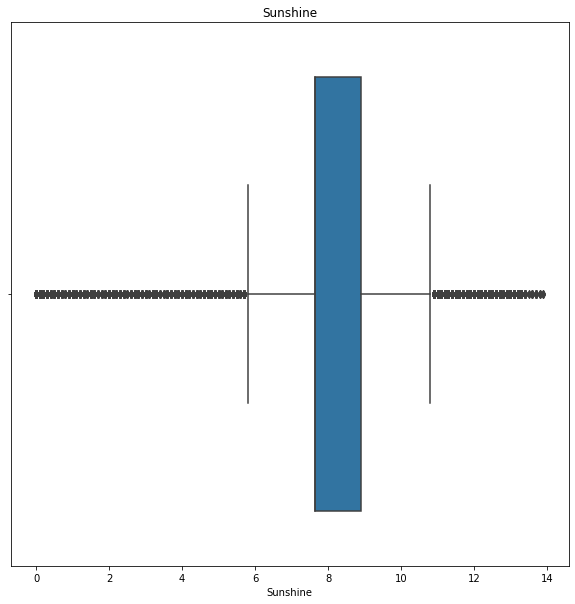

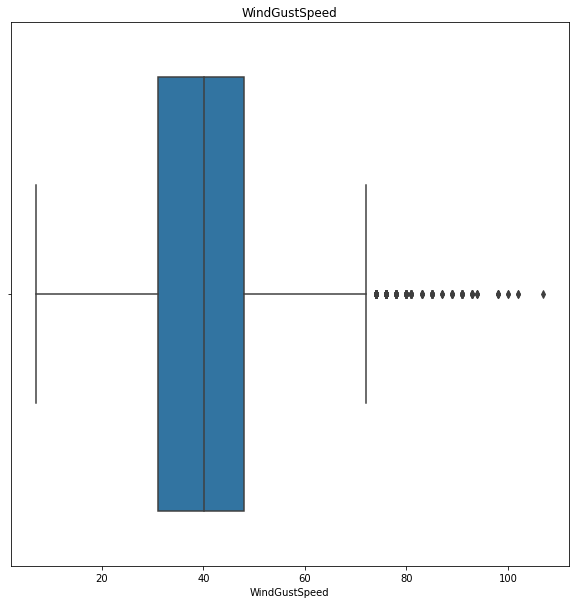

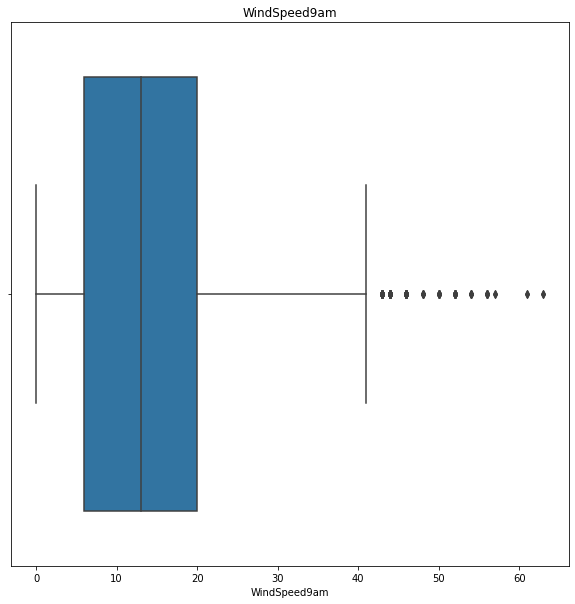

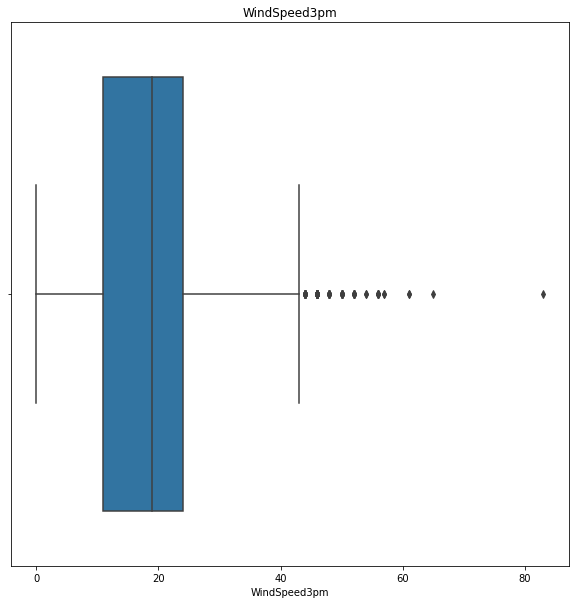

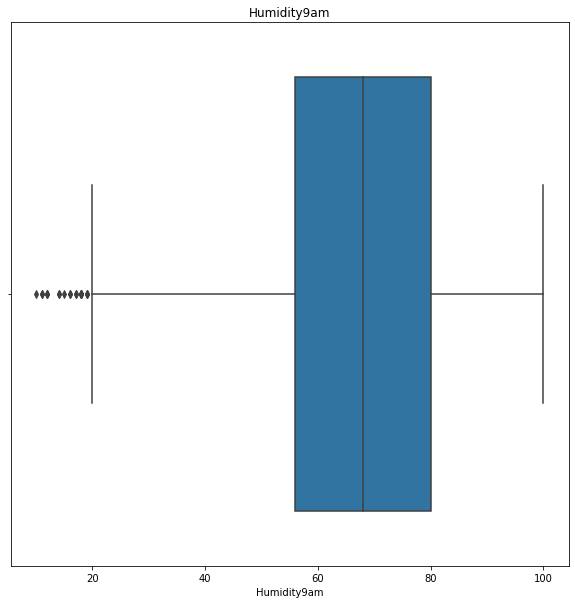

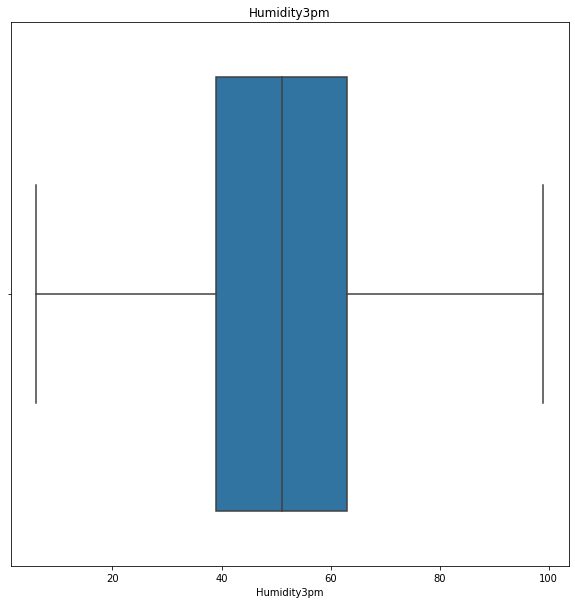

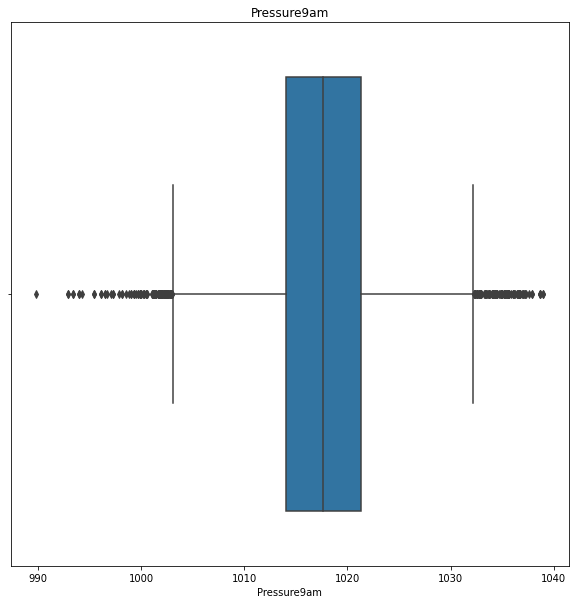

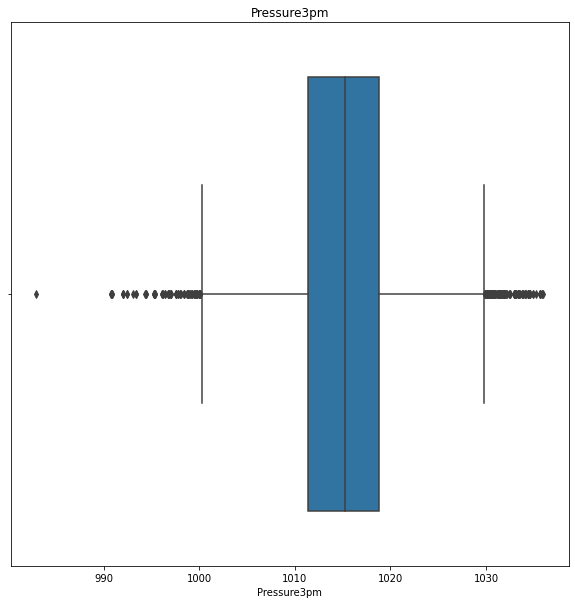

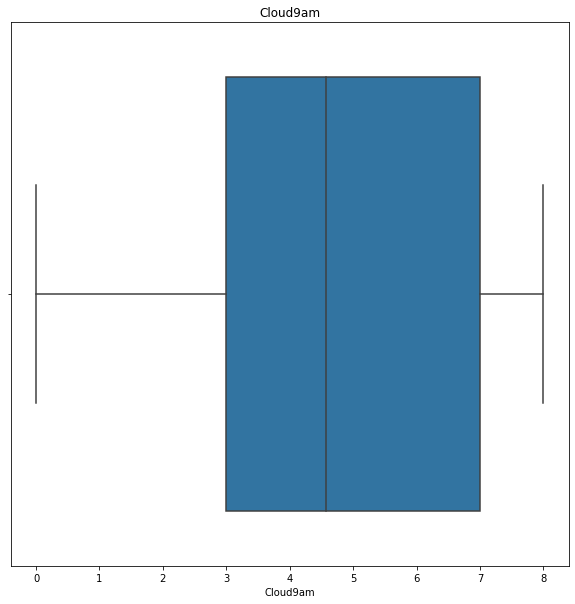

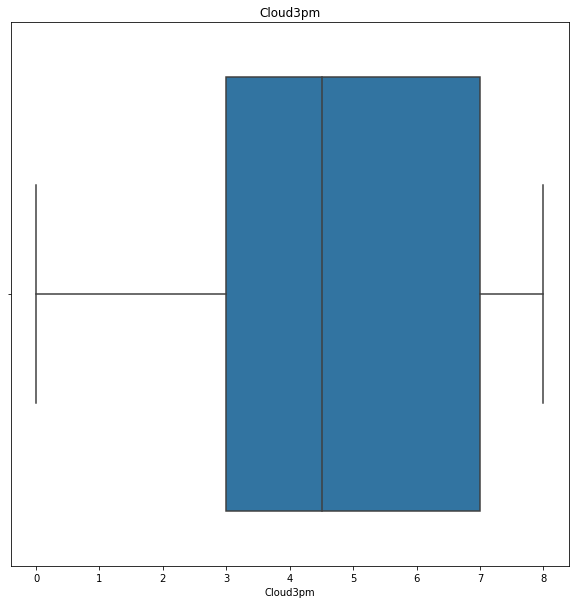

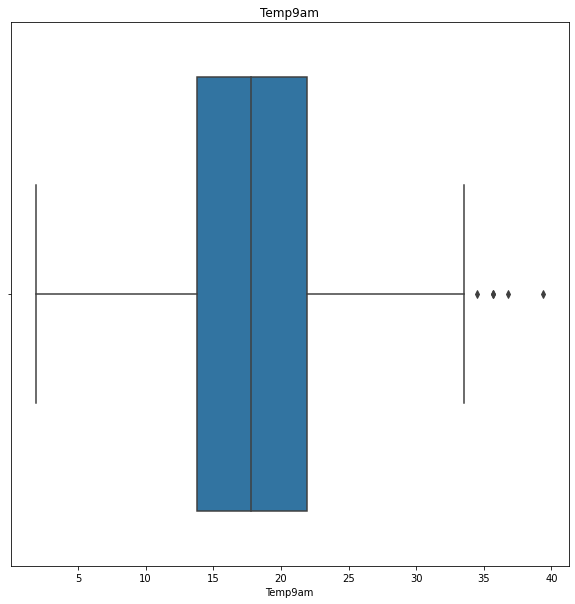

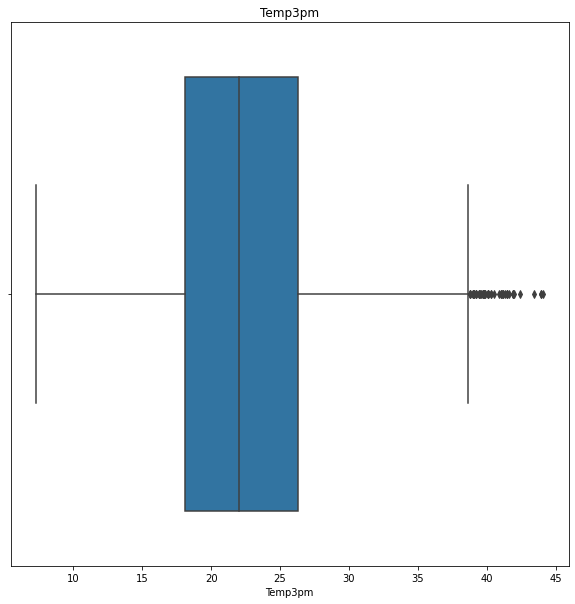

In [39]:
#checking for outliers using Box Plot:

for feature in numerical_feature:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)
    

In [40]:
# features which has outliers:

feature_with_outliers = [ 'MaxTemp', 'Sunshine','Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']

### Rain fall have outliers but it does not remove because it is target column.

In [41]:
# Replacing outliers using IQR:

for feature in feature_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

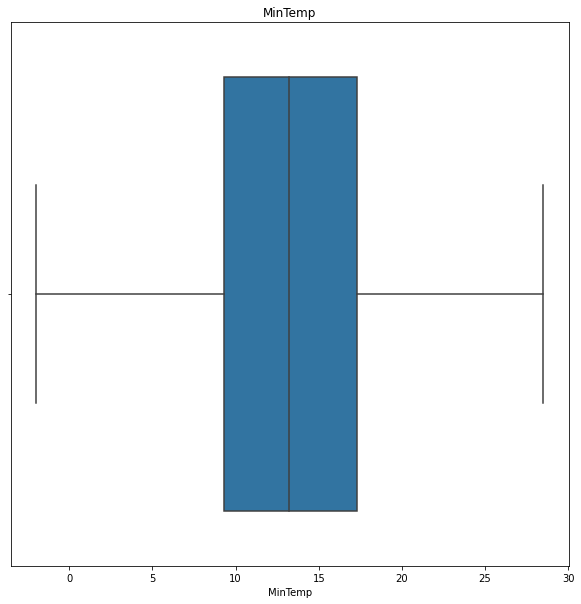

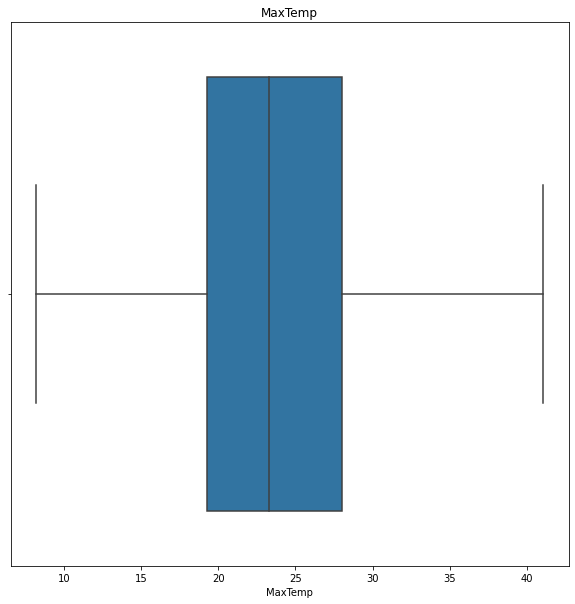

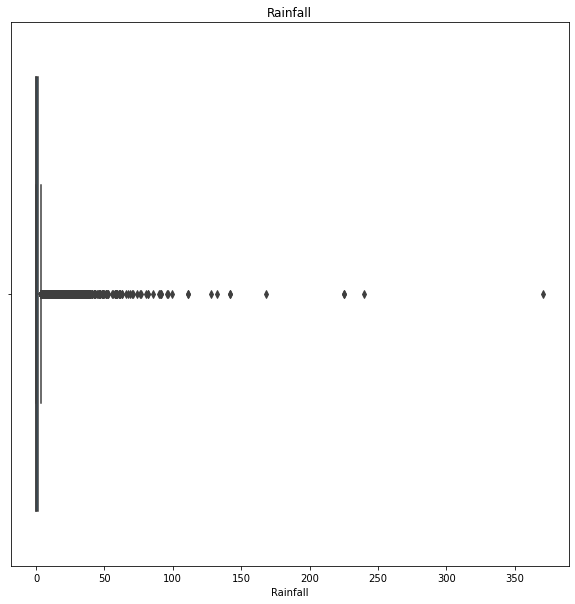

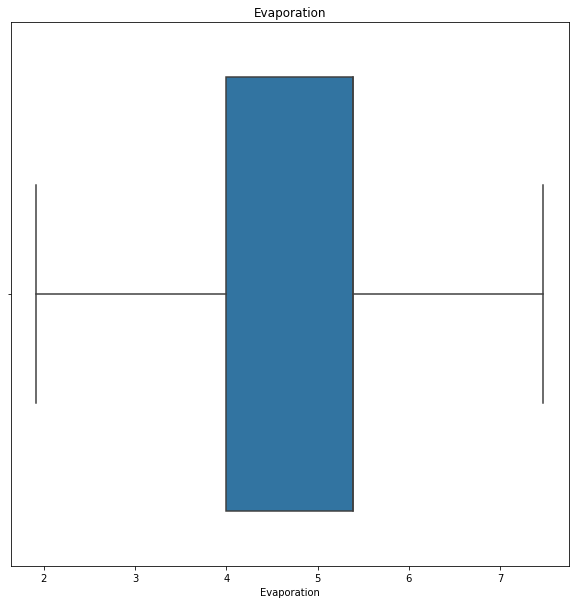

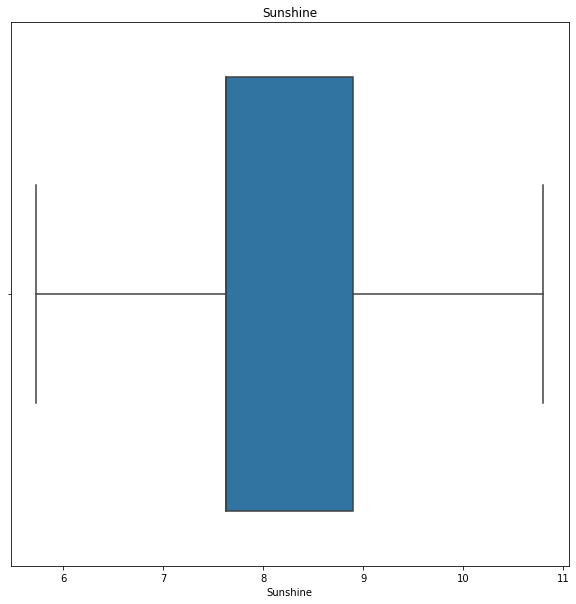

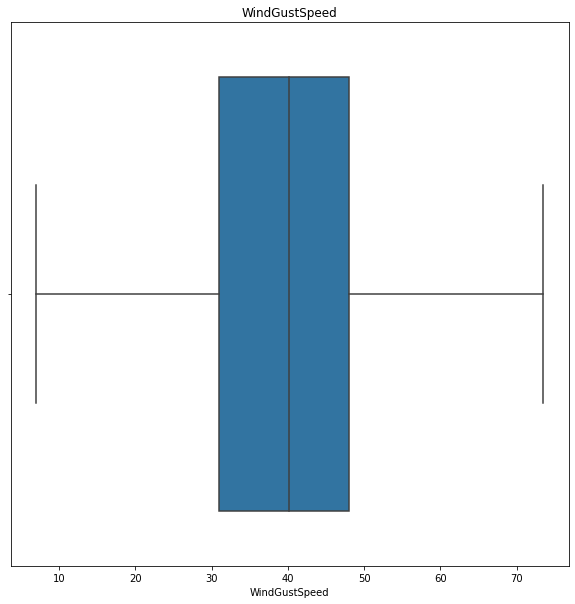

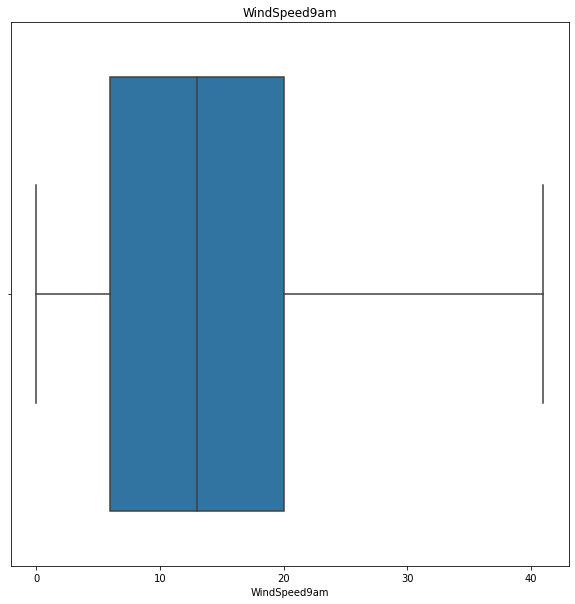

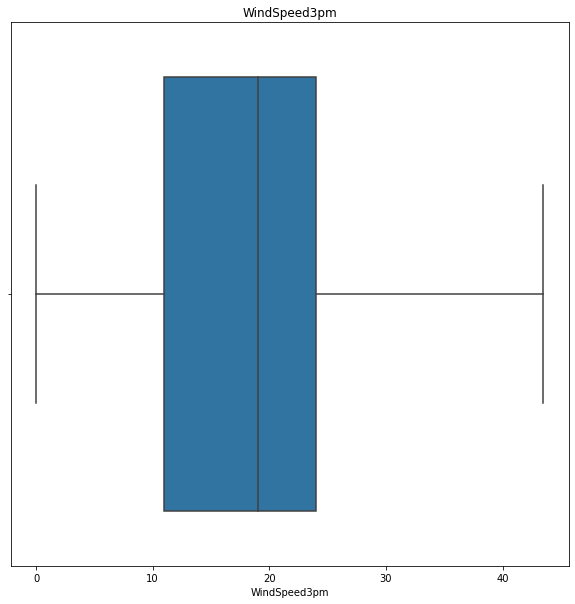

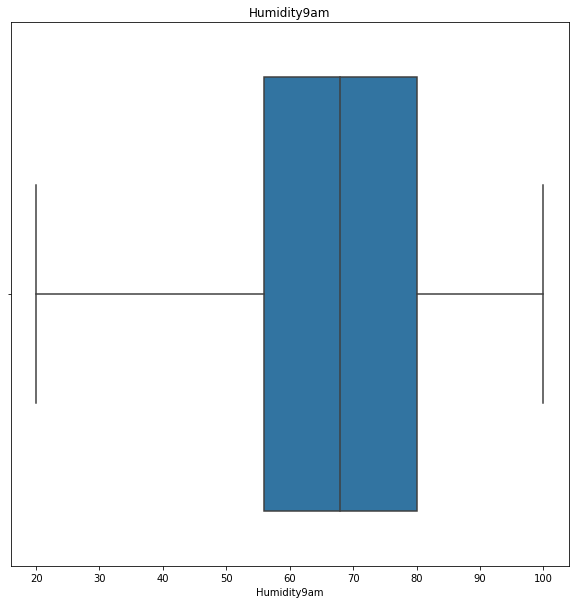

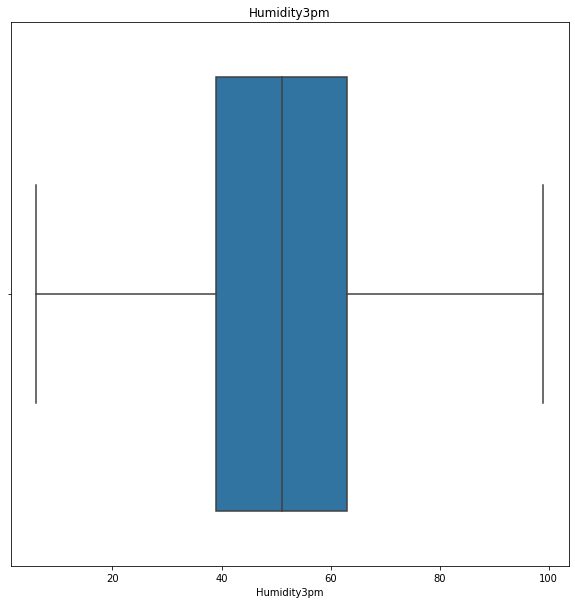

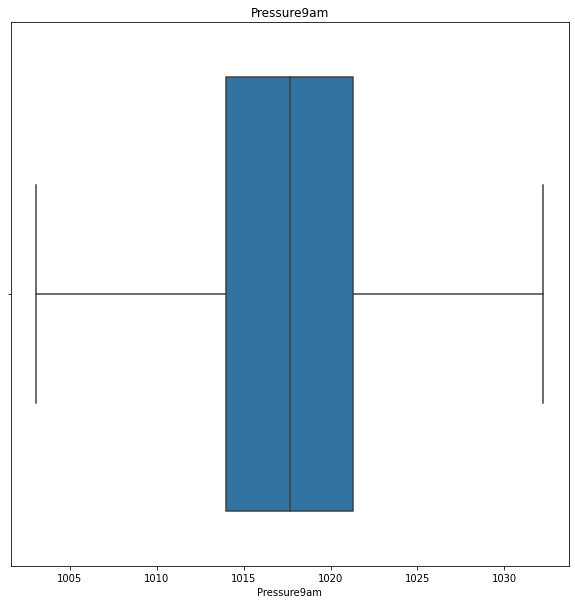

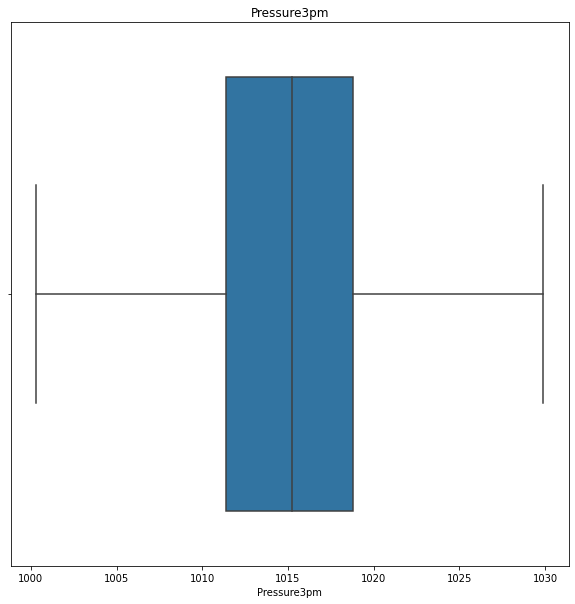

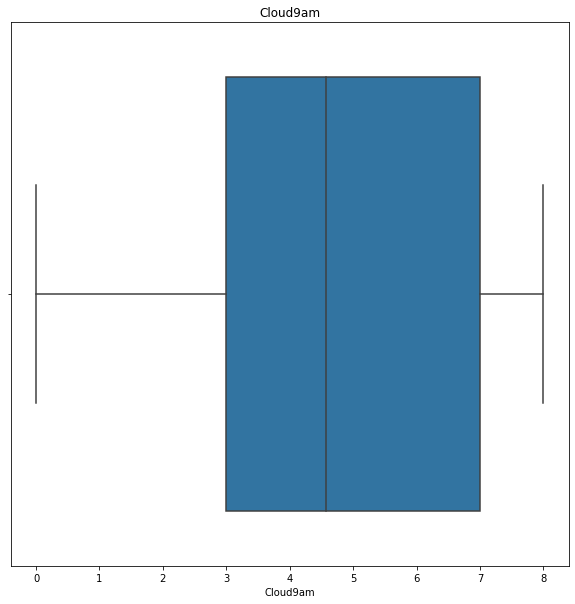

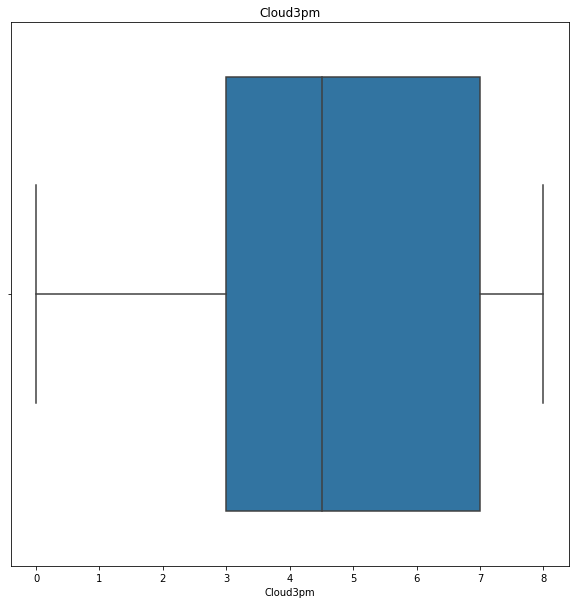

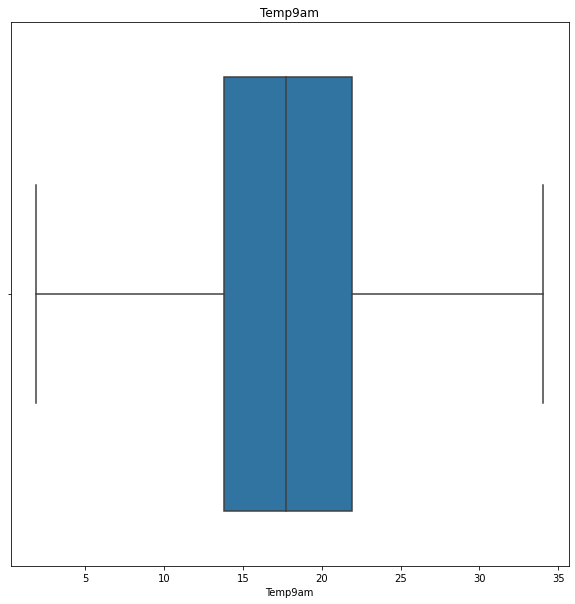

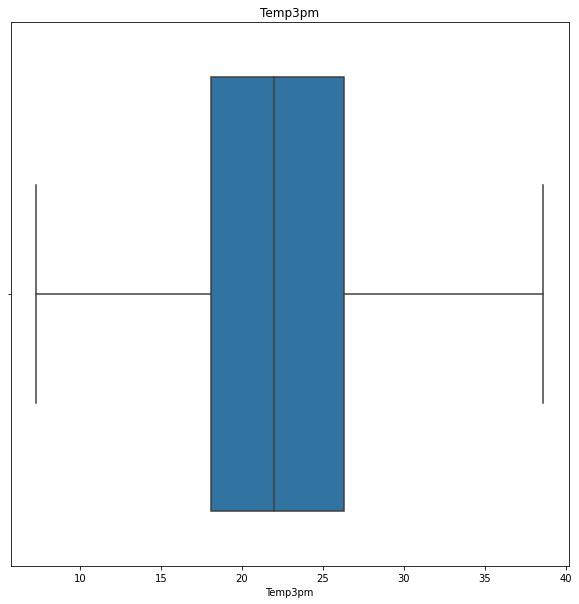

In [42]:
for feature in numerical_feature:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [43]:
#Spliting data into input features and label

X = df.drop(['Rainfall'],axis=1)
Y = df['Rainfall']

## Split data into train and test

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [45]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train

array([[ 0.06546443,  0.79452605, -0.19718322, ..., -0.16482355,
        -0.55060959, -0.55609919],
       [ 1.65148265,  0.45974688, -0.39413659, ..., -0.50315966,
        -0.55060959, -0.55609919],
       [-1.52055378, -1.34434087, -0.16435766, ...,  0.02126131,
        -0.55060959, -0.55609919],
       ...,
       [-0.25173921, -0.76777674, -0.91934558, ..., -0.89224619,
        -0.55060959,  1.79824035],
       [ 1.334279  ,  1.07350869,  0.27878743, ...,  0.2750134 ,
         1.81616888, -0.55609919],
       [ 0.38266807, -0.4887941 , -1.52661847, ..., -1.36591675,
         1.81616888,  1.79824035]])

In [48]:
# it's all value is >10 so we drop this column
X.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

## Machine Learning Model for Regression and Evaluation Metrics

In [49]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

#### I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.


In [50]:
#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error


In [51]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 7.865433080417671
R2 Score is: 29.228979634752704
Cross Validation Score: 24.334420248837592
R2 Score - Cross Validation Score is 4.894559385915112


In [52]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 14.620029511458439
R2 Score is: -144.51565788509373
Cross Validation Score: -162.37441172813152
R2 Score - Cross Validation Score is 17.85875384303779


In [53]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 5.993379338706041
R2 Score is: 58.908337814305675
Cross Validation Score: 48.95189007007023
R2 Score - Cross Validation Score is 9.956447744235447


In [54]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 8.65487817218962
R2 Score is: 14.309614917699642
Cross Validation Score: -3.0546398272657194
R2 Score - Cross Validation Score is 17.36425474496536


In [55]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 8.497914807416683
R2 Score is: 17.389562479858757
Cross Validation Score: -0.7830891390478301
R2 Score - Cross Validation Score is 18.17265161890659


In [56]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 7.994549254200467
R2 Score is: 26.886404531052953
Cross Validation Score: 23.12433895371992
R2 Score - Cross Validation Score is 3.7620655773330327


# Hyperparameter tuning

In [57]:
import tensorflow as tf

In [58]:
 tf.test.gpu_device_name()

'/device:GPU:0'

In [59]:
 #Choosing Extra Tree Regressor

fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'max_features': ["auto", "sqrt", "log2"],
              'n_jobs':[6]}

In [60]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [61]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200], 'n_jobs': [6]})

In [62]:
GSCV.best_params_

{'max_features': 'log2', 'n_estimators': 150, 'n_jobs': 6}

In [63]:
Final_Model = ExtraTreesRegressor(max_features='sqrt', n_estimators=150, n_jobs=6)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 55.13545760388563


# Saving The best model

In [64]:
import joblib
filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)

['FinalModel.pkl']